In [18]:
#Import required libraries
import pandas as pd 
import regex as re
import os
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

# Data Wrangling

### Geolocation

In [2]:
#Import Geolocation dataset
geo_df = pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\olist_geolocation_dataset.csv")
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [3]:
#Get info

geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


* The geolocation data contains **10000163** rows and **5** columns.
* The geolocation_zip_code_prefix column is an integer datatype. It should be converted to a string object.

In [4]:
#Convert geolocation_zip_code_prefix column to string
geo_df["geolocation_zip_code_prefix"] =  geo_df["geolocation_zip_code_prefix"].astype('str')

#Rename geolocation_zip_code_prefix column 
geo_df.rename(columns={"geolocation_zip_code_prefix":"geolocation_zipcode"}, inplace=True)

In [5]:
#Confirm the datatype and name update
geo_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   geolocation_zipcode  1000163 non-null  object 
 1   geolocation_lat      1000163 non-null  float64
 2   geolocation_lng      1000163 non-null  float64
 3   geolocation_city     1000163 non-null  object 
 4   geolocation_state    1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


In [6]:
#View top 5 rows
geo_df.head()

,geolocation_zipcode,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Sellers

In [7]:
#Import sellers df
sellers = pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\olist_sellers_dataset.csv")

sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [8]:
#Review the shape and profile of the sellers df
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [9]:
#Check sellers df for duplicates
sellers.duplicated().sum()

0

In [10]:
#Check sellers df for null values
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

* The sellers dataframe contains 3095 rows and 4 columns. 
* It does contain any duplicate or null values. 
* The datatype of the seller_zip_code_prefix is an integer instead of a string.
* The seller zipcode can be merged on the geolocation zipcode to extract the longitude and latitude values. These can be used to create a coordinate column for computing the distance across locations

In [11]:
#Convert zip code column to a string object
sellers["seller_zip_code_prefix"] = sellers["seller_zip_code_prefix"].astype('str')

#Remove the prefix from the xip_code column name
sellers.rename(columns = {"seller_zip_code_prefix" : "seller_zipcode"}, inplace=True)

In [12]:
#Confirm an update to the data type of the zipcode column
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   seller_id       3095 non-null   object
 1   seller_zipcode  3095 non-null   object
 2   seller_city     3095 non-null   object
 3   seller_state    3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


In [13]:
#Merge the sellers and geo_df to get longitude and latitue vaues
sellers_geo = sellers.merge(geo_df, left_on='seller_zipcode', right_on = 'geolocation_zipcode')

#Create the coordinate column as a combination on the latitiue and longitude values
sellers_geo["seller_coor"] = list(zip(sellers_geo["geolocation_lat"], sellers_geo["geolocation_lng"]))
sellers_geo.head()

,seller_id,seller_zipcode,seller_city,seller_state,geolocation_zipcode,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_coor
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.898536,-47.063125,campinas,SP,"(-22.898536428530225, -47.063125168330544)"
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.895499,-47.061944,campinas,SP,"(-22.895499290034056, -47.061943920624365)"
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.891740,-47.060820,campinas,SP,"(-22.891740265335557, -47.060819685815694)"
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.895762,-47.066144,campinas,SP,"(-22.895761620407654, -47.06614422014823)"
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.896154,-47.062431,campinas,SP,"(-22.896153837642057, -47.062431210369965)"


In [14]:
#Drop unnecessary columns
sellers_geo.drop(columns=["geolocation_zipcode", "geolocation_lat", "geolocation_lng", "geolocation_city", "geolocation_state"], inplace=True)
sellers_geo.head()

,seller_id,seller_zipcode,seller_city,seller_state,seller_coor
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,"(-22.898536428530225, -47.063125168330544)"
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,"(-22.895499290034056, -47.061943920624365)"
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,"(-22.891740265335557, -47.060819685815694)"
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,"(-22.895761620407654, -47.06614422014823)"
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,"(-22.896153837642057, -47.062431210369965)"


In [15]:
#Confirm update to sellers geo df
sellers_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435087 entries, 0 to 435086
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   seller_id       435087 non-null  object
 1   seller_zipcode  435087 non-null  object
 2   seller_city     435087 non-null  object
 3   seller_state    435087 non-null  object
 4   seller_coor     435087 non-null  object
dtypes: object(5)
memory usage: 19.9+ MB


* The sellers geo dataframe is clean and now contains the coordinate points for sellers locations

### Customers

In [16]:
#Import customers df
customers = pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\olist_customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [17]:
#Review the shape and profile of the customers df
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [18]:
#Check customers df for duplicates
customers.duplicated().sum()

0

In [19]:
#Check customers df for null values
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

* The customers table consists of 99441 rows and 5 columns without duplicates or null values.
* It is however observed that there's a datatype mismatch on the **customer_zip_code_prefix** column. It should be stored as a string as opposed to an integer since it holds the unique zip codes per city.
* The customer zipcode can also be merged on the geolocation zipcode to extract the longitude and latitude values. These can be used to create a coordinate column for computing the distance across locations

In [20]:
#Convert customer_zip_code_prefix column to string
customers["customer_zip_code_prefix"] = customers["customer_zip_code_prefix"].astype('str')

#Remove the prefix from the xip_code column name
customers.rename(columns = {"customer_zip_code_prefix" : "customer_zipcode"}, inplace=True)

In [21]:
#Confirm the data type and column name change
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_zipcode    99441 non-null  object
 3   customer_city       99441 non-null  object
 4   customer_state      99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [22]:
#Merge the customers and geo_df to get longitude and latitue vaues
cus_geo = customers.merge(geo_df, left_on='customer_zipcode', right_on = 'geolocation_zipcode')

#Create the coordinate column as a combination on the latitiue and longitude values
cus_geo["customer_coor"] = list(zip(cus_geo["geolocation_lat"], cus_geo["geolocation_lng"]))
cus_geo.head()

,customer_id,customer_unique_id,customer_zipcode,customer_city,customer_state,geolocation_zipcode,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_coor
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,"(-20.509897499999997, -47.3978655)"
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.497396,-47.399241,franca,SP,"(-20.497396193014072, -47.39924094190359)"
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.510459,-47.399553,franca,SP,"(-20.51045862987575, -47.39955309167686)"
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.480940,-47.394161,franca,SP,"(-20.480940023267937, -47.39416132556492)"
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.515413,-47.398194,franca,SP,"(-20.51541329065829, -47.39819363894111)"


In [23]:
#Drop unnecessary columns
cus_geo.drop(columns=["geolocation_zipcode", "geolocation_lat", "geolocation_lng", "geolocation_city", "geolocation_state"], inplace=True)
cus_geo.head()

,customer_id,customer_unique_id,customer_zipcode,customer_city,customer_state,customer_coor
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,"(-20.509897499999997, -47.3978655)"
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,"(-20.497396193014072, -47.39924094190359)"
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,"(-20.51045862987575, -47.39955309167686)"
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,"(-20.480940023267937, -47.39416132556492)"
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,"(-20.51541329065829, -47.39819363894111)"


The customer geo dataset is now clean and complete with the customer coordinates.

### Product Category

In [24]:
#Import products df
product_cat =  pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\product_category_name_translation.csv")

product_cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [25]:
#Review the shape and profile of the products df
product_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [26]:
#Check products df for duplicates
product_cat.duplicated().sum()

0

In [27]:
#Check products df for null values()
product_cat.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

* The product category dataframe contains 71 rows and 2 columns with the correct datat type for each column. 
* Each column speaks to the prodict category in Portuguese and English Language.
* The dataframe does contain any duplicate or null values.

In [28]:
#Rename the product_category_name_english column
product_cat.rename(columns = {"product_category_name_english":"product_category"}, inplace=True)

#Confirm the change in the column name
product_cat.columns

Index(['product_category_name', 'product_category'], dtype='object')

* The product category name column in Portuguese is dropped.
* The product category column named in English is renamed to be more descriptive

### Orders

In [29]:
#Import orders df
orders = pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\olist_orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [30]:
#Review the shape and profile of the orders df
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [31]:
#Check orders df for duplicates
orders.duplicated().sum()

0

In [32]:
#Check orders df for null values()
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

* The orders dataframe contains timestamp, customer_id, order_id and order_status detail on every order made.
* It consists of 94441 rows and 8 columns without duplicates.
* The timestamp columns are of object string data type instead of datetime.
* Some datetime columns contain null values.

In [33]:
#Update timestamp columns to the correct datatype
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [34]:
#Confirm the datatype change for timestamp coolumns
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


All timestamp columns have now been converted to datetime.

In [35]:
#Review rows with no approved dates
unapproved = orders[orders['order_approved_at'].isna()]
unapproved.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30


In [36]:
#Confirming the order status of orders without approved dates
unapproved.order_status.value_counts().reset_index()

,index,order_status
0,canceled,141
1,delivered,14
2,created,5


In [37]:
#View top 5 rows of unapproved
unapproved.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30


* For orders without approval dates it is observed their status were either canceled, created or delivered. A large number of these orders were however either canceled or just created orders.
* For delivered orders without approval dates, it is observed that;
  * Both carrier (pick-up) and delivery dates were recorded.
  * These orders were infact delivered before the estimated delivery date.
  * The absence of approved dates for these orders may be due to oversight in the data entry process.
* The approval date for delivered orders can be temporarily fixed by assume that the orders were automatically approved at the time of the purchase.

In [38]:
#Extract unapproved but delivered orders
unapproved_delivered = ((orders['order_approved_at'].isna()) & (orders['order_status'] == 'delivered'))

#Update approval time for delivered orders to purchase time.
orders.loc[unapproved_delivered, "order_approved_at"]= orders.loc[unapproved_delivered, "order_purchase_timestamp"]
orders.loc[unapproved_delivered,:]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,2017-02-18 14:40:00,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,2017-02-18 12:45:31,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,2017-02-18 13:29:47,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,2017-02-18 16:48:35,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,2017-02-17 13:05:55,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,2017-01-19 12:48:08,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,2017-02-19 01:28:47,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,2017-02-18 11:04:19,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,2017-01-19 22:26:59,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,2017-02-17 17:21:55,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [39]:
#Review rows with no carrier dates
non_carrier = orders[orders['order_delivered_carrier_date'].isna()]
non_carrier.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09


In [40]:
#Confirming the order status of orders without carrier dates
non_carrier.order_status.value_counts()

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: order_status, dtype: int64

In [41]:
#Confirm delivery status of rows withou carrier dates
non_carrier.query("order_status == 'delivered'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


* For orders without carrier (pick-up) dates it is observed that;
  * The order status were either unavailable, canceled, invoiced, processing, created, approved or delivered. 
  * A large number of these orders were however either unavailable or canceled.
* For delivered orders without carrier dates, it is observed that;
  * Only one order was delivered. It was however delivered after the estimated delivery date. 
  * The second order recorded as delivered did not have a delivery date.
* The carrier date for delivered orders can be also be temporarily fixed by equating it to the approval time of the purchase.
  

In [42]:
#Extract delivered orders without carrier dates
delivered_noncarrier = (orders['order_delivered_carrier_date'].isna()) & (orders['order_status'] == 'delivered')

#Update carrier time for delivered orders to purchase time
orders.loc[delivered_noncarrier, "order_delivered_carrier_date"] = orders.loc[delivered_noncarrier, "order_purchase_timestamp"]
orders.loc[delivered_noncarrier, :]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,2017-09-29 08:52:58,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,NaT,2017-06-23


In [43]:
##Review rows with no delivery dates
undelivered = orders[orders['order_delivered_customer_date'].isna()]
undelivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07


In [44]:
#Confirming the order status of orders without delivery dates
undelivered.order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

In [45]:
undelivered.query("order_status == 'delivered'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


* For orders without delivery dates it is observed their status is recorded as shipped, processed, canceled, approved, created and delivered. 
  * A large number of these orders were however either being shipped, invoiced, processed, canceled or are unavailable.
* For delivered orders without delivery dates, the dates can be temporarily imputed by adding the average delivery duration to the carrier time for these orders.

In [46]:
#Compute delivery time
avg_delivery_time= (orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"]).mean()
avg_delivery_time

Timedelta('9 days 07:56:37.872558978')

In [47]:
#Extract delivered orders without delivery dates
delivered_nodelivery_date = (orders["order_delivered_customer_date"].isna() & (orders["order_status"] == 'delivered'))

In [48]:
#Replace non_delivery dates with a sum of the carrier date and the average delivery time
orders.loc[delivered_nodelivery_date,"order_delivered_customer_date"] = orders.loc[delivered_nodelivery_date,"order_delivered_carrier_date"] + avg_delivery_time
orders.loc[delivered_nodelivery_date,:]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,2017-12-10 02:09:00.872558978,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,2018-07-04 16:01:37.872558978,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,2018-07-12 21:53:37.872558978,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,2018-07-12 21:53:37.872558978,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,2018-07-12 17:24:37.872558978,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,2017-06-04 07:19:20.872558978,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,2018-06-21 22:06:37.872558978,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,2018-07-13 03:22:37.872558978,2018-07-19


In [49]:
# Compute delivery duration in days and hours for all orders
orders["delivery_duration"] = (orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"])
orders["delivery_hours"] = orders["delivery_duration"]/ dt.timedelta(hours=1)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,delivery_hours
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,145.503611
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,288.945833
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,220.274722
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43,226.811944
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28,46.507778


In [50]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   customer_id                    99441 non-null  object         
 2   order_status                   99441 non-null  object         
 3   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 4   order_approved_at              99295 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   97660 non-null  datetime64[ns] 
 6   order_delivered_customer_date  96484 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns] 
 8   delivery_duration              96484 non-null  timedelta64[ns]
 9   delivery_hours                 96484 non-null  float64        
dtypes: datetime64[ns](5), float64(1), object(3), timedelta64[ns](1)
memory

The orders table is now clean without inconsistencies.

### Order Items

In [51]:
order_items = pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\olist_order_items_dataset.csv")

order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [52]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [53]:
order_items.duplicated().sum()

0

In [54]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

* The order_items table consists of 112650 rows and 7 columns without duplicated or null values.
* It is however observed that there's a datatype mismatch on the **shipping_limit_date** and **order_item_id** columns.
  * The shipping limit_date column should be stores as a datetime column
  * The order_item_id column should be stored as a string as opposed to an integer since it holds the unique id per order item.

In [55]:
#Convert order_item_id to string object
order_items["order_item_id"] = order_items['order_item_id'].astype('str')

#Convert shipping_limit_date to datetime
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])

In [56]:
#Confirm the datatype change
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  object        
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.0+ MB


## Reviews

In [57]:
reviews = pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\olist_order_reviews_dataset.csv")
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [58]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [59]:
reviews.duplicated().sum()

0

In [60]:
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

* The reviews table contains **99224** rows and **7** columns.
* The **review_creation_date** and **review_answer_timestamp** columns are saved as string objects. 
  * These will be converted to datetime objects.
* There are null values in the **review_comment_title** and **review_comment_message** columns.
  * The null values in both columns will be reviewed.

In [61]:
#Convert review_creation_date and review_answer_timestamp to datetime objects
reviews["review_answer_timestamp"] = pd.to_datetime(reviews["review_answer_timestamp"])
reviews["review_creation_date"] = pd.to_datetime(reviews["review_creation_date"])

#Confirm the updated datetype
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [62]:
#Review null rows for review_comment_title and review_comment_message columns
reviews_null = reviews[reviews["review_comment_title"].isna() & reviews["review_comment_message"].isna()]
reviews_null.shape

(56518, 7)

In [63]:
#Review rows with at least a null row in either review_comment_title or review_comment_message columns
reviews_ornull = (reviews[reviews["review_comment_title"].isna() | reviews["review_comment_message"].isna()])
reviews_ornull.shape


(89385, 7)

* There are **>50000** rows without a review comment title and a review message. This is more than **50%** of the reviews dataframe
* There are however more **89385** rows with either a review comment title or message. The rows are too much to be dropped for now hence they will be retained.

In [64]:
reviews.review_comment_title.value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

In [65]:
#Keep rows with either a review message comment or title.
reviews1 = reviews_ornull.copy()
reviews1["review_comment_title"].value_counts()

recomendo               75
Recomendo               69
Bom                     65
Ótimo                   58
super recomendo         57
                        ..
Muito bom gostei         1
Estão de parabéns        1
Amei o meu coberdrom     1
Rápido e ótimo           1
OTIMA EMBALAGEM          1
Name: review_comment_title, Length: 690, dtype: int64

In [66]:
reviews.shape

(99224, 7)

In [67]:
#Create master orders_df
orders_df = orders.merge(order_items, on="order_id") \
    .merge(reviews, on="order_id")

#Review orders dataset
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,delivery_hours,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,145.503611,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,288.945833,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,220.274722,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43,226.811944,...,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28,46.507778,...,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17,2018-02-18 13:02:51


## Payments

In [68]:
payments= pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\olist_order_payments_dataset.csv")

payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [69]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [70]:
payments.duplicated().sum()

0

In [71]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

## Products

In [72]:
products = pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\olist_products_dataset.csv")

products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [73]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [74]:
#Check for duplicate values
products[products.duplicated()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [75]:
#Checking for null values for each dataframe
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

* The product column contains **32951** rows and **9** columns of which 7 columns are float objects.
* There are null values in the **8** columns asides the product_id.
* The product_name_lenght and product_description_lenght are wrongly spelt and will be renamed.

In [76]:
#Renaming the product_name_lenght and product_description_lenght columns
products.rename(columns={"product_name_lenght":"product_name_length", "product_description_lenght":"product_description_length"}, inplace=True)
products.columns

Index(['product_id', 'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [77]:
#Descriptive analytics of Products table
products.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [78]:
#Define a function to replace missing rows in columns
def replace_null(df, col):
    if df[col].dtypes == "object":
        df[col] = np.where(df[col].isnull(), "unknown", df[col]) #replace missing rows in a categorical column with unkownn
    else:
        median = df[col].median()
        df.loc[df[col].isnull(), col] = median #missing rows in a numerical column with the median values
    return df

In [79]:
#Create a list of column names
col_null_values = ["product_category_name", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]

#Apply replace null function
for c in col_null_values:
    replace_null(products, c)

In [80]:
#Check for null values
products.isna().sum()

product_id                      0
product_category_name           0
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [81]:
#Create master products dataframe with products and product_cat
products_df = products.merge(product_cat, on="product_category_name")
products_df.sample(10)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
5932,1121a43969b79e65010c2a5cdd0dcb6c,utilidades_domesticas,58.0,1204.0,1.0,11489.0,42.0,67.0,42.0,housewares
24659,81521040c9500ac8e175c2839d193a46,telefonia,50.0,722.0,2.0,100.0,20.0,16.0,12.0,telephony
19973,d3d5a1d52abe9a7d234908d873fc377b,malas_acessorios,24.0,520.0,3.0,4900.0,38.0,55.0,22.0,luggage_accessories
31881,9927048351cd36357bd4227c238f478b,musica,48.0,432.0,2.0,150.0,16.0,9.0,11.0,music
6370,b1599324bbd2fda5befde0d69a9028a2,utilidades_domesticas,57.0,1040.0,7.0,550.0,18.0,13.0,14.0,housewares
7996,ce8139ec854c7484df66f211738c0746,cool_stuff,27.0,792.0,1.0,5350.0,40.0,20.0,40.0,cool_stuff
8176,9291234bfd76d396f56b5175d435dd84,moveis_decoracao,40.0,274.0,1.0,200.0,27.0,10.0,12.0,furniture_decor
27241,8e4ddd0db3411d756ce077eb15a63272,relogios_presentes,51.0,979.0,2.0,320.0,18.0,11.0,14.0,watches_gifts
29409,d177efa9bee6dfa421c10f7b1bcf51c7,eletroportateis,40.0,389.0,1.0,450.0,22.0,10.0,13.0,small_appliances
14530,50fe86b557f5fa0dd5d24d5d105e4ec7,cama_mesa_banho,55.0,683.0,1.0,3647.0,41.0,21.0,37.0,bed_bath_table


In [82]:
#Drop unnecessary columns from products_df
products_df.drop(columns=["product_name_length", "product_description_length", "product_photos_qty", "product_category_name"], inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 0 to 32327
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         32328 non-null  object 
 1   product_weight_g   32328 non-null  float64
 2   product_length_cm  32328 non-null  float64
 3   product_height_cm  32328 non-null  float64
 4   product_width_cm   32328 non-null  float64
 5   product_category   32328 non-null  object 
dtypes: float64(4), object(2)
memory usage: 1.7+ MB


### Cleaned Dataframes

In [83]:
#Write cleaned dataframes to csv files
#orders_df.to_csv("OlistOrders.csv", index= False)
#payments.to_csv("OlistPayments.csv", index= False)
#sellers.to_csv("OlistSellers.csv", index=False)
#customers.to_csv("OlistCustomers.csv", index=False)
#products_df.to_csv("OlistProducts.csv", index=False)

In [84]:
#Write sellers_geo dataframe to csv file
#sellers_geo.to_csv("OlistSellersGeo.csv", index=False)

In [85]:
#Write cus_geo dataframe to csv file
#cus_geo.to_csv("OlistCustomersGeo.csv", index=False)

## Master Dataframe

In [86]:
#Create Master df
Master_df = orders_df.merge(payments, on="order_id") \
    .merge(customers, on='customer_id') \
        .merge(products_df, on ="product_id") \
            .merge(sellers, on="seller_id")

In [87]:
#Confirm shape and datatype of master df
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       115609 non-null  object         
 1   customer_id                    115609 non-null  object         
 2   order_status                   115609 non-null  object         
 3   order_purchase_timestamp       115609 non-null  datetime64[ns] 
 4   order_approved_at              115609 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   114416 non-null  datetime64[ns] 
 6   order_delivered_customer_date  113217 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  115609 non-null  datetime64[ns] 
 8   delivery_duration              113217 non-null  timedelta64[ns]
 9   delivery_hours                 113217 non-null  float64        
 10  order_item_id                  115609 non-null  object  

In [88]:
#Checking null values
Master_df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date       1193
order_delivered_customer_date      2392
order_estimated_delivery_date         0
delivery_duration                  2392
delivery_hours                     2392
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0


In [89]:
#Check for duplicate rows
Master_df.duplicated().sum()

0

In [90]:
#Drop duplicate rows if any
Master_df.drop_duplicates(inplace=True)

#Confirm there are no duplicate rows
Master_df.duplicated().sum()

0

In [91]:
#Confirmimg rows without carrier (pick-up) and delivery date
ad = Master_df[(Master_df['order_delivered_carrier_date'].isna()) | (Master_df['order_delivered_customer_date'].isna())]
ad['order_status'].value_counts()

shipped        1138
canceled        529
invoiced        358
processing      357
unavailable       7
approved          3
Name: order_status, dtype: int64

In [92]:
#Write Master df to csv file
Master_df.to_csv("OlistMaster.csv", index=False)

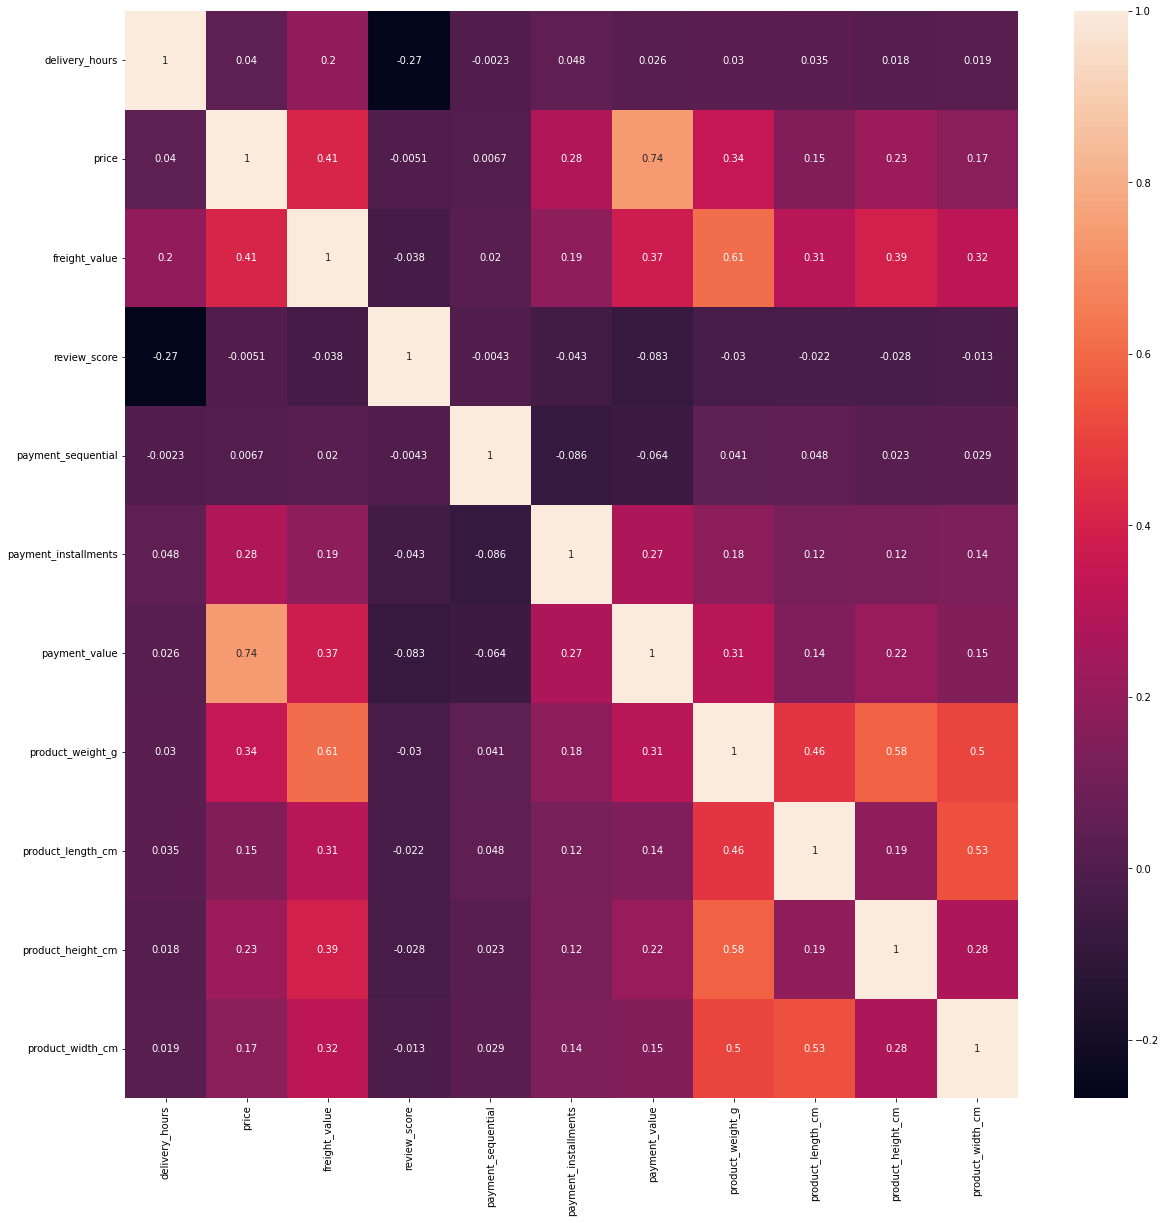

In [93]:
plt.figure(figsize=(20,20))
sns.heatmap(Master_df.corr(),annot=True)
plt.show()

# Data Analysis & Exploration

### Location

In [94]:
#Top sales by State
TopSales_state = Master_df.groupby(["customer_state"]).agg({"payment_value":"sum"})
TopSales_state.sort_values(ascending=False, by="payment_value")[:10].reset_index()

,customer_state,payment_value
0,SP,7502926.95
1,RJ,2708839.33
2,MG,2288949.71
3,RS,1131899.22
4,PR,1055747.81
5,BA,780334.54
6,SC,769744.94
7,GO,459466.06
8,DF,430126.51
9,ES,390840.58


* **SP** state is observed to have made the highest total sales of **$7,502,926.95**, closely followed by **RJ** state with a total sales of **$2,708,839.33**.

In [95]:
#Lets look at the top and average sales by State & City

TopSales_city = Master_df.groupby(["customer_state", "customer_city"]).agg({"payment_value":"sum"})
TopSales_city.sort_values(ascending=False, by="payment_value")[:10].reset_index()

,customer_state,customer_city,payment_value
0,SP,sao paulo,2807526.03
1,RJ,rio de janeiro,1536347.93
2,MG,belo horizonte,492767.96
3,DF,brasilia,428036.30
4,PR,curitiba,327886.88
5,RS,porto alegre,311302.47
6,BA,salvador,281542.27
7,SP,campinas,262096.32
8,SP,guarulhos,199503.82
9,RJ,niteroi,174032.30


In [96]:
#Top sales by product category per state and city.
TopProduct_city = Master_df.groupby(["customer_state", "customer_city", "product_category"]).agg({"payment_value":"sum", "order_item_id":"count"})
TopProduct_city = TopProduct_city.sort_values(ascending=False, by="payment_value")[:13].reset_index()
TopProduct_city

,customer_state,customer_city,product_category,payment_value,order_item_id
0,SP,sao paulo,bed_bath_table,295685.33,2172
1,SP,sao paulo,computers_accessories,288500.24,1256
2,SP,sao paulo,health_beauty,263482.10,1792
3,SP,sao paulo,watches_gifts,194797.90,861
4,SP,sao paulo,sports_leisure,192716.46,1462
5,SP,sao paulo,furniture_decor,192627.46,1357
6,SP,sao paulo,housewares,165754.91,1397
7,RJ,rio de janeiro,bed_bath_table,127026.50,907
8,RJ,rio de janeiro,fixed_telephony,112491.22,24
9,RJ,rio de janeiro,sports_leisure,107840.56,606


Text(0, 0.5, 'Sales')

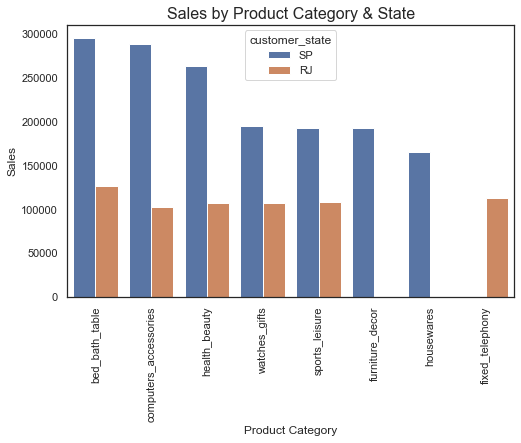

In [97]:
#Plot top saless by state and product category
plt.figure(figsize=(8,5))

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x="product_category", y='payment_value', hue = "customer_state", data=TopProduct_city)

#Rotate x_axis labels
plt.xticks(rotation=90)

#add overall title
plt.title('Sales by Product Category & State', fontsize=16)

#add axis titles
plt.xlabel('Product Category')
plt.ylabel('Sales')

Text(0, 0.5, 'Orders')

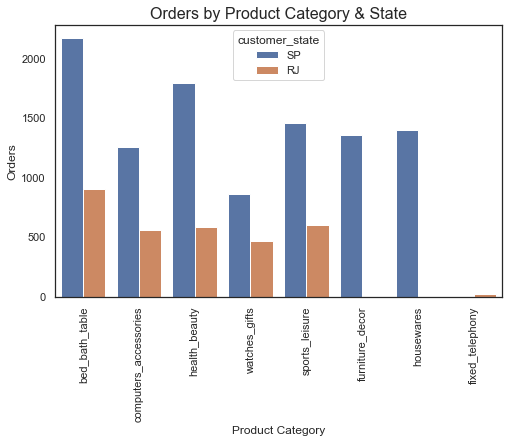

In [98]:
#Plot top orders by state and product category
plt.figure(figsize=(8,5))

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x="product_category", y='order_item_id', hue = "customer_state", data=TopProduct_city)

#Rotate x_axis labels
plt.xticks(rotation=90)

#add overall title
plt.title('Orders by Product Category & State', fontsize=16)

#add axis titles
plt.xlabel('Product Category')
plt.ylabel('Orders')

* **Sao Paulo** city in **SP** state is observed to have made the highest total sales of **$2,807,526.03**, closely followed by **Rio De Janeiro** city in **RJ** with a total sales of **1536347.93**.
  * **Campinas** and **Guarulhos** are two other cities in **SP** state with significant total sales of **$262,096.32** and **$199,503.82**
* It can be seen that **SP** and **RJ** states are in the lead with significant sales in more than one city.
* **SP** and **RJ** states have high orders and sales in similar categories such as:
  * **bed_bath_table**
  * **computers_accessories**
  * **sports_leisure**
  * **health_beauty**
  * **watches_gifts**
* However, in **RJ** state, product category **fixed_telephony** has the second highest value in total sales and orders.
* In **SP** state, product category **computers_accessories** has the second highest value in total sales and orders.

### Customers

In [99]:
# Lets look at the total customers by state and city
TotCus_city = Master_df.groupby(["customer_state", "customer_city"]).agg({"customer_id":"count"})
TotCus_city = TotCus_city.sort_values(ascending=False, by="customer_id")[:10].reset_index()
TotCus_city

,customer_state,customer_city,customer_id
0,SP,sao paulo,18267
1,RJ,rio de janeiro,8022
2,MG,belo horizonte,3196
3,DF,brasilia,2434
4,PR,curitiba,1790
5,SP,campinas,1702
6,RS,porto alegre,1632
7,BA,salvador,1468
8,SP,guarulhos,1370
9,SP,sao bernardo do campo,1098


* It is observed that **SP** state has the highest number of customers across several cities like;
    * **Sao Paulo**
    *  **Campinas**
    *  **Guarulhos**
    *  **Sao Bernardo Do Campo**

In [100]:
# Lets look at the top customers by the total order items

TopOrders_customer = Master_df.groupby(["customer_id", "customer_state", "customer_city"]).agg({"order_item_id":"count"})
Top_buying_customers = TopOrders_customer.sort_values(ascending=False, by="order_item_id")[:10].reset_index()
Top_buying_customers

,customer_id,customer_state,customer_city,order_item_id
0,270c23a11d024a44c896d1894b261a83,SP,sao paulo,63
1,13aa59158da63ba0e93ec6ac2c07aacb,RJ,rio de janeiro,38
2,9af2372a1e49340278e7c1ef8d749f34,MT,cuiaba,29
3,92cd3ec6e2d643d4ebd0e3d6238f69e2,SP,sao paulo,26
4,63b964e79dee32a3587651701a2b8dbf,SP,atibaia,24
5,d22f25a9fadfb1abbc2e29395b1239f4,MT,sinop,24
6,2ba91e12e5e4c9f56b82b86d9031d329,SP,suzano,24
7,86cc80fef09f7f39df4b0dbce48e81cb,RS,itaqui,24
8,6ee2f17e3b6c33d6a9557f280edd2925,SP,guarulhos,24
9,b246eeed30b362c09d867b9e598bee51,SP,tupa,22


Based on the total order items, most customers with large orders reside across several cities in **SP** and **MT** states.

In [101]:
# Lets look at the top buying customers by the amount they spend
Top_buying_customers = Master_df.groupby(["customer_id", "customer_city", "customer_state"]).agg({"payment_value":"sum", "order_item_id":"count"})
Top_buying_customers = Top_buying_customers.sort_values(ascending=False, by="payment_value")[:10].reset_index()
Top_buying_customers

,customer_id,customer_city,customer_state,payment_value,order_item_id
0,1617b1357756262bfa56ab541c47bc16,rio de janeiro,RJ,109312.64,8
1,be1b70680b9f9694d8c70f41fa3dc92b,sao paulo,SP,44048.00,20
2,05455dfa7cd02f13d132aa7a6a9729c6,divinopolis,MG,36489.24,6
3,1ff773612ab8934db89fd5afa8afe506,rio de janeiro,RJ,30186.00,10
4,ec5b2ba62e574342386871631fafd3fc,vila velha,ES,29099.52,4
5,e7d6802668de6e74d0d6c56565bf2a24,sao paulo,SP,22346.60,10
6,8c20d9bfbc96c5d39025d77a3ba83d7f,cicero dantas,BA,21874.05,11
7,f7622098214b4634b7fe7eee269b5426,campo novo do parecis,MT,19457.04,6
8,71901689c5f3e5adc27b1dd16b33f0b8,sao luis,MA,19174.38,6
9,be1c4e52bb71e0c54b11a26b8e8d59f2,sao paulo,SP,18786.90,22


* Although **SP** has the largest customer base and total order items across several cities, the top buying customer actually resides in **Rio De Daneiro** city of **RJ** state.
* It is even more interesting that this top buying customer only has a total of 8 order items.

In [102]:
# Lets look at the product category of the items bought by top customer 1617b1357756262bfa56ab541c47bc16 in RJ state
TopRJ_customer = Master_df.query("customer_id == '1617b1357756262bfa56ab541c47bc16'")
TopRJ_customer.product_category.value_counts()


fixed_telephony    8
Name: product_category, dtype: int64

In [103]:
# Confirming the price and freight value of the items bought by top customer 1617b1357756262bfa56ab541c47bc16 in RJ state
TopRJ_customer[["price", "freight_value"]].value_counts()

price   freight_value
1680.0  28.01            8
dtype: int64

In [104]:
# Lets look at the product category of the items bought by top customer be1b70680b9f9694d8c70f41fa3dc92b in SP state
TopSP_customer = Master_df.query("customer_id == 'be1b70680b9f9694d8c70f41fa3dc92b'")
TopSP_customer["product_category"].value_counts()

computers_accessories    20
Name: product_category, dtype: int64

In [105]:
#Confirm the price abd freight value of items bought by top customer in RJ state
TopSP_customer[["price", "freight_value"]].value_counts()

price  freight_value
100.0  10.12            20
dtype: int64

It is observed that the price and freight value of the items bought by the top customer in **RJ** state is more expensive than that bought by the top customer in **SP** state despite having a lower order number. This explains the higher purchasing power of top customer **1617b1357756262bfa56ab541c47bc16** from **RJ** state.

### Products

In [106]:
#Lets review the Top10 products by total sales & orders
Top10_products = Master_df.groupby("product_category").agg({"payment_value":"sum", "order_id":"nunique", "order_item_id":"count"})
Top10_products = Top10_products.sort_values(ascending=False, by=["payment_value", "order_id"])[:10].reset_index()
Top10_products

,product_category,payment_value,order_id,order_item_id
0,bed_bath_table,1725465.67,9313,11847
1,health_beauty,1646292.53,8770,9944
2,computers_accessories,1592611.66,6649,8105
3,furniture_decor,1427214.01,6398,8743
4,watches_gifts,1420682.17,5576,6161
5,sports_leisure,1390581.87,7669,8942
6,housewares,1091709.15,5843,7331
7,garden_tools,834757.45,3496,4558
8,auto,802254.74,3877,4356
9,cool_stuff,772616.70,3599,3964


Text(0, 0.5, 'Orders')

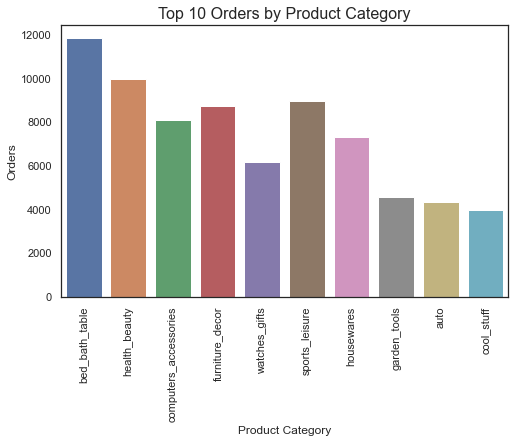

In [107]:
#Plot top orders by state and product category
plt.figure(figsize=(8,5))

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x="product_category", y='order_item_id', data=Top10_products)

#Rotate x_axis labels
plt.xticks(rotation=90)

#add overall title
plt.title('Top 10 Orders by Product Category', fontsize=16)

#add axis titles
plt.xlabel('Product Category')
plt.ylabel('Orders')

Text(0, 0.5, 'Sales')

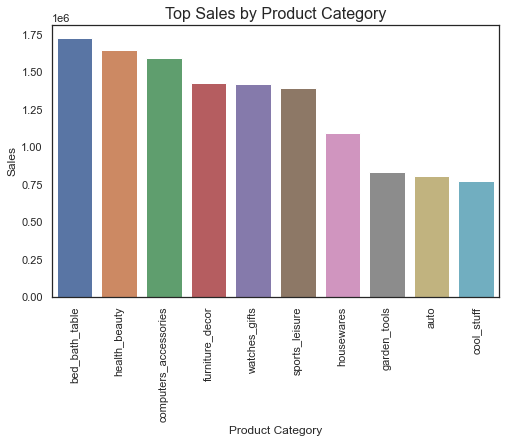

In [108]:
#Plot top orders by state and product category
plt.figure(figsize=(8,5))

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x="product_category", y='payment_value', data=Top10_products)

#Rotate x_axis labels
plt.xticks(rotation=90)

#add overall title
plt.title('Top Sales by Product Category', fontsize=16)

#add axis titles
plt.xlabel('Product Category')
plt.ylabel('Sales')

In [109]:
#Top10 products by average sales and orders
Avg10_products = Master_df.groupby("product_category").agg({"payment_value":"mean", "order_item_id":"count"})
Avg10_products = Avg10_products.sort_values(ascending=False, by="payment_value")[:10].reset_index()
Avg10_products

,product_category,payment_value,order_item_id
0,computers,1244.453502,217
1,fixed_telephony,767.301152,269
2,small_appliances_home_oven_and_coffee,656.786154,78
3,agro_industry_and_commerce,471.153214,252
4,home_appliances_2,464.267313,268
5,office_furniture,364.313553,1773
6,signaling_and_security,343.163166,199
7,construction_tools_safety,331.549495,198
8,musical_instruments,323.607177,712
9,small_appliances,321.246423,699


In [110]:
#Confirming the average price & freight value by Product category
MeanSales_cat = Master_df.groupby(["product_category"]).agg({"price":"mean", "freight_value":"mean"})
MeanSales_cat = MeanSales_cat.sort_values(ascending=False, by="price")[:10].reset_index()
MeanSales_cat

,product_category,price,freight_value
0,computers,1078.555806,47.247281
1,small_appliances_home_oven_and_coffee,627.509103,36.982821
2,home_appliances_2,459.567388,46.039925
3,agro_industry_and_commerce,332.706151,27.646111
4,musical_instruments,290.755042,27.321798
5,small_appliances,285.925980,23.982189
6,fixed_telephony,227.291004,17.538587
7,construction_tools_safety,211.861162,20.068182
8,watches_gifts,202.204692,16.822451
9,air_conditioning,186.085791,22.669327


Text(0, 0.5, 'Freight Value')

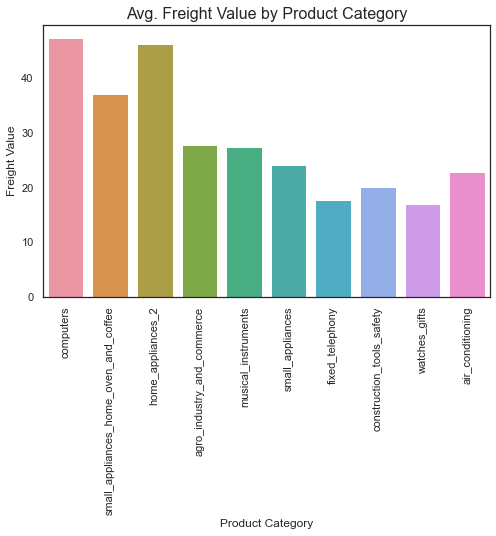

In [111]:
#Plot avg freight by product category
plt.figure(figsize=(8,5))

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set_palette("PuRd")

#create grouped bar chart
sns.barplot(x="product_category", y='freight_value', data=MeanSales_cat)

#Rotate x_axis labels
plt.xticks(rotation=90)

#add overall title
plt.title('Avg. Freight Value by Product Category', fontsize=16)

#add axis titles
plt.xlabel('Product Category')
plt.ylabel('Freight Value')

Text(0, 0.5, 'Price')

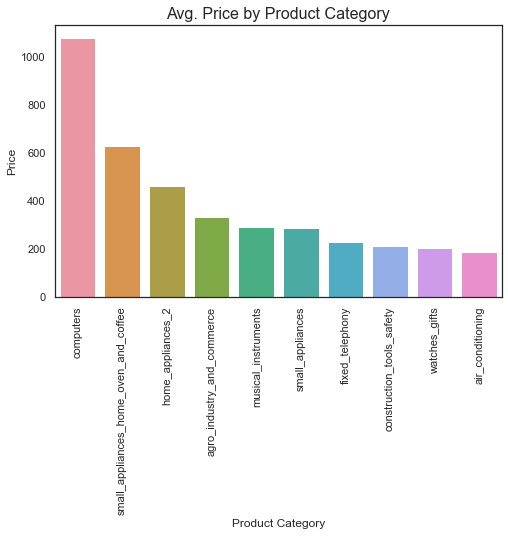

In [112]:
#Plot avg price by product category
plt.figure(figsize=(8,5))

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set_palette("PuRd")

#create grouped bar chart
sns.barplot(x="product_category", y='price', data=MeanSales_cat)

#Rotate x_axis labels
plt.xticks(rotation=90)

#add overall title
plt.title('Avg. Price by Product Category', fontsize=16)

#add axis titles
plt.xlabel('Product Category')
plt.ylabel('Price')

* The product category **bed_bath_table** has the total highest sales and orders, closely followed by **health_beauty** and **computers_accessories**. However, large orders do not automatically guarantee high sales as can be seen in product categories **furniture_decor** and **sports_leisure**.
* The average prices and freight value of product categories like **computers**, **small_appliances_home_oven_and_coffee** and **home_appliances_2** are quite expensive compared to other categories. Order for items in these categories also seem to fall below **300**

In [113]:
#Top10 best reviews by product category
Toprev_products = Master_df.groupby("product_category").agg({"review_score":"mean", "price":"mean", "order_item_id":"count"})
Toprev_products = Toprev_products.sort_values(ascending=False, by="review_score")[:10].reset_index()
Toprev_products

,product_category,review_score,price,order_item_id
0,cds_dvds_musicals,4.642857,52.142857,14
1,fashion_childrens_clothes,4.500000,71.231250,8
2,books_general_interest,4.438503,85.420143,561
3,books_imported,4.419355,78.255645,62
4,flowers,4.419355,32.265806,31
5,costruction_tools_tools,4.415842,157.853465,101
6,books_technical,4.375465,71.431004,269
7,food_drink,4.324138,56.653517,290
8,small_appliances_home_oven_and_coffee,4.320513,627.509103,78
9,luggage_accessories,4.295945,127.554918,1159


Text(0, 0.5, 'Review Score')

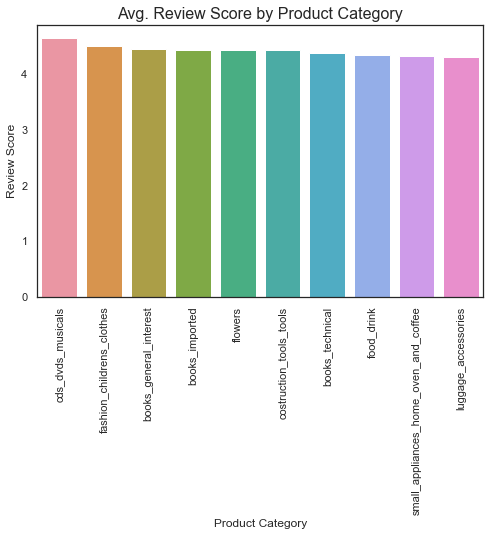

In [114]:
#Plot avg. review score by product category
plt.figure(figsize=(8,5))

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set_palette("PuRd")

#create grouped bar chart
sns.barplot(x="product_category", y='review_score', data=Toprev_products)

#Rotate x_axis labels
plt.xticks(rotation=90)

#add overall title
plt.title('Avg. Review Score by Product Category', fontsize=16)

#add axis titles
plt.xlabel('Product Category')
plt.ylabel('Review Score')

In [115]:
#Top products with shortest delivery time
Topdel_products = Master_df.groupby("product_category").agg({"review_score":"mean", "price":"mean", "order_item_id":"count", "delivery_duration":"mean", "delivery_hours":"mean"})
Topdel_products = Topdel_products.sort_values(ascending=True, by="delivery_duration")[:10].reset_index()
Topdel_products

,product_category,review_score,price,order_item_id,delivery_duration,delivery_hours
0,arts_and_craftmanship,4.125000,75.583750,24,3 days 14:03:54.166666666,86.065046
1,books_imported,4.419355,78.255645,62,5 days 14:10:06.372881355,134.168437
2,la_cuisine,4.133333,144.465333,15,5 days 20:37:25.600000,140.623778
3,construction_tools_lights,4.065574,134.875836,305,6 days 05:42:10.751655629,149.702987
4,diapers_and_hygiene,3.256410,40.194615,39,6 days 15:59:04.540540540,159.984595
5,party_supplies,3.847826,103.373478,46,6 days 20:04:38.133333333,164.077259
6,fashion_childrens_clothes,4.500000,71.231250,8,6 days 22:50:01,166.833611
7,small_appliances_home_oven_and_coffee,4.320513,627.509103,78,7 days 02:02:57.200000,170.049222
8,drinks,4.044271,59.483906,384,7 days 02:25:32.172506738,170.425603
9,fashio_female_clothing,3.780000,57.788800,50,7 days 02:36:09.347826087,170.602597


* Product categories with the highest review score and lowest delivery time seem to have low orders except **construction_tools_lights** and **drinks**.
  * These product categories seem to revolve around **fashion**, **art**, **books**, **tools** and **home appliances**.
  * The delivery duration for product_category **drinks** of 7 days or 170 hours seems to be quite high even though it has a higher review score than **party_supplies** and **diapers_and_hygiene** categories.

In [116]:
#Lets review the top product categories by sellers, and customers
Top_sellersproduct = Master_df.groupby("product_category").agg({"seller_id":"nunique", "customer_id":"nunique"})
Top_sellersproduct.reset_index().sort_values(by="seller_id", ascending=False)[:20]

,product_category,seller_id,customer_id
43,health_beauty,491,8770
65,sports_leisure,481,7669
49,housewares,467,5843
5,auto,382,3877
39,furniture_decor,370,6398
15,computers_accessories,287,6649
20,cool_stuff,264,3599
69,toys,251,3853
6,baby,242,2861
42,garden_tools,235,3496


In [117]:
#Let's review the total sellers and and customers specifically for drinks product category
drinks = Master_df.query("product_category == 'drinks'")
drinks.groupby("product_category").agg({"seller_id":"nunique", "customer_id":"nunique"})

,seller_id,customer_id
product_category,,
drinks,36,296


In [118]:
# Lets compare the location/ cities of sellers to buyers of the drinks category
drinks.groupby(["product_category", "seller_state", "customer_state"]).agg({"seller_id":"nunique", "customer_id":"nunique"})

seller_id  customer_id
product_category seller_state customer_state                        
drinks           BA           BA                      1            1
                 DF           SP                      1            1
                 GO           GO                      1            1
                              MG                      1            1
                              SP                      1            2
                 MG           GO                      1            1
                              MG                      2            2
                              RJ                      1            1
                              SP                      2            7
                 PR           MG                      1            1
                              PR                      2            2
                              RJ                      1            2
                              RS                      2            2
                              SC                      1            1
                              SP                      3            6
                 RS           DF                      1            1
                              ES                      1            1
                              MG                      1            1
                              RJ                      1            1
                              SC                      1            1
                              SP                      1            2
                 SC           SP                      2            2
                 SP           AL                      1            1
                              AM                      1            1
                              BA                      3            4
                              CE                      1            2
                              DF                      1            4
                              ES                      4            4
                              GO                      1            2
                              MG                      2           15
                              MS                      1            4
                              MT                      1            1
                              PA                      1            1
                              PI                      1            1
                              PR                      4            8
                              RJ                      8           37
                              RS                      5           12
                              SC                      2           12
                              SP                     15          147

* It is observed that the sellers to customers margin for the **drinks** category is quite wide.
* It is observed that most sellers for the **drinks** product category have a huge percentage of their customers in other states outside theirs. Lets try to compute the distance betwwen sellers and buyers in this case.

In [119]:
#Compute the distance between sellers and buyers by merging with the sellers geo and cus_geo datasets
drinks_cat = drinks.merge(sellers_geo, on="seller_id") \
    .merge(cus_geo, on="customer_id")

In [120]:
drinks_cat.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,delivery_hours,...,seller_state_x,seller_zipcode_y,seller_city_y,seller_state_y,seller_coor,customer_unique_id_y,customer_zipcode_y,customer_city_y,customer_state_y,customer_coor
0,c228d309379c3ae545cc6ca2d5aae1b2,eca5e1383292be5fc6c5b1aa3e1215b5,delivered,2018-06-30 21:57:55,2018-06-30 22:10:13,2018-07-02 13:39:00,2018-07-04 21:48:36,2018-07-24,2 days 08:09:36,56.16,...,SP,11701,praia grande,SP,"(-24.011288218359883, -46.41873374429398)",b36e3758a257a9e554bfae4d648b2950,17514,marilia,SP,"(-22.188742247875226, -49.93422578806241)"
1,c228d309379c3ae545cc6ca2d5aae1b2,eca5e1383292be5fc6c5b1aa3e1215b5,delivered,2018-06-30 21:57:55,2018-06-30 22:10:13,2018-07-02 13:39:00,2018-07-04 21:48:36,2018-07-24,2 days 08:09:36,56.16,...,SP,11701,praia grande,SP,"(-24.011288218359883, -46.41873374429398)",b36e3758a257a9e554bfae4d648b2950,17514,marilia,SP,"(-22.178727817098487, -49.9202370051359)"
2,c228d309379c3ae545cc6ca2d5aae1b2,eca5e1383292be5fc6c5b1aa3e1215b5,delivered,2018-06-30 21:57:55,2018-06-30 22:10:13,2018-07-02 13:39:00,2018-07-04 21:48:36,2018-07-24,2 days 08:09:36,56.16,...,SP,11701,praia grande,SP,"(-24.011288218359883, -46.41873374429398)",b36e3758a257a9e554bfae4d648b2950,17514,marilia,SP,"(-22.17847949999999, -49.91650199999999)"
3,c228d309379c3ae545cc6ca2d5aae1b2,eca5e1383292be5fc6c5b1aa3e1215b5,delivered,2018-06-30 21:57:55,2018-06-30 22:10:13,2018-07-02 13:39:00,2018-07-04 21:48:36,2018-07-24,2 days 08:09:36,56.16,...,SP,11701,praia grande,SP,"(-24.011288218359883, -46.41873374429398)",b36e3758a257a9e554bfae4d648b2950,17514,marilia,SP,"(-22.19283397140636, -49.93300675353456)"
4,c228d309379c3ae545cc6ca2d5aae1b2,eca5e1383292be5fc6c5b1aa3e1215b5,delivered,2018-06-30 21:57:55,2018-06-30 22:10:13,2018-07-02 13:39:00,2018-07-04 21:48:36,2018-07-24,2 days 08:09:36,56.16,...,SP,11701,praia grande,SP,"(-24.011288218359883, -46.41873374429398)",b36e3758a257a9e554bfae4d648b2950,17514,marilia,SP,"(-22.185966405216693, -49.93195386816896)"


In [121]:
#check the shape of drinks category
drinks_cat.shape

(13010309, 47)

In [122]:
#Check for duplicate values
drinks_cat.duplicated().sum()

#Drop duplicates if any
drinks_cat.drop_duplicates(inplace=True)

In [123]:
#Confirm the shape and datatype of drinks_cat
drinks_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4757479 entries, 0 to 13010224
Data columns (total 47 columns):
 #   Column                         Dtype          
---  ------                         -----          
 0   order_id                       object         
 1   customer_id                    object         
 2   order_status                   object         
 3   order_purchase_timestamp       datetime64[ns] 
 4   order_approved_at              datetime64[ns] 
 5   order_delivered_carrier_date   datetime64[ns] 
 6   order_delivered_customer_date  datetime64[ns] 
 7   order_estimated_delivery_date  datetime64[ns] 
 8   delivery_duration              timedelta64[ns]
 9   delivery_hours                 float64        
 10  order_item_id                  object         
 11  product_id                     object         
 12  seller_id                      object         
 13  shipping_limit_date            datetime64[ns] 
 14  price                          float64        
 1

In [124]:
#Select only required columns
drinks_df = drinks_cat[["order_id","order_item_id","seller_id", "customer_id","product_category", "seller_state_x", "customer_state_x", "delivery_duration", "seller_coor", "customer_coor", "delivery_hours"]]
drinks_df.head()

,order_id,order_item_id,seller_id,customer_id,product_category,seller_state_x,customer_state_x,delivery_duration,seller_coor,customer_coor,delivery_hours
0,c228d309379c3ae545cc6ca2d5aae1b2,1,e9779976487b77c6d4ac45f75ec7afe9,eca5e1383292be5fc6c5b1aa3e1215b5,drinks,SP,SP,2 days 08:09:36,"(-24.011288218359883, -46.41873374429398)","(-22.188742247875226, -49.93422578806241)",56.16
1,c228d309379c3ae545cc6ca2d5aae1b2,1,e9779976487b77c6d4ac45f75ec7afe9,eca5e1383292be5fc6c5b1aa3e1215b5,drinks,SP,SP,2 days 08:09:36,"(-24.011288218359883, -46.41873374429398)","(-22.178727817098487, -49.9202370051359)",56.16
2,c228d309379c3ae545cc6ca2d5aae1b2,1,e9779976487b77c6d4ac45f75ec7afe9,eca5e1383292be5fc6c5b1aa3e1215b5,drinks,SP,SP,2 days 08:09:36,"(-24.011288218359883, -46.41873374429398)","(-22.17847949999999, -49.91650199999999)",56.16
3,c228d309379c3ae545cc6ca2d5aae1b2,1,e9779976487b77c6d4ac45f75ec7afe9,eca5e1383292be5fc6c5b1aa3e1215b5,drinks,SP,SP,2 days 08:09:36,"(-24.011288218359883, -46.41873374429398)","(-22.19283397140636, -49.93300675353456)",56.16
4,c228d309379c3ae545cc6ca2d5aae1b2,1,e9779976487b77c6d4ac45f75ec7afe9,eca5e1383292be5fc6c5b1aa3e1215b5,drinks,SP,SP,2 days 08:09:36,"(-24.011288218359883, -46.41873374429398)","(-22.185966405216693, -49.93195386816896)",56.16


In [125]:
! pip install geopy
import geopy.distance as GD

#define a function to a calculate the distance between buyers and sellers
def distancer(row):
    coords_1 = (row['seller_coor'][0], row['seller_coor'][1])
    coords_2 = (row['customer_coor'][0], row['customer_coor'][1])
    return GD.geodesic(coords_1, coords_2).miles

#apply distancer function
drinks_df["distance_miles"] = drinks_df.apply(distancer, axis=1)
drinks_df.sample(10)

KeyboardInterrupt: 

In [126]:
#Total average distance in miles
drinks_df['distance_miles'].mean()

KeyError: 'distance_miles'

In [ ]:
#Average distance to customers in miles per seller city
drinks_df.groupby("seller_state_x")['distance_miles'].mean()

seller_state_x
BA    442.885520
DF    542.594200
GO    456.968903
MG     69.002650
PR    392.820977
RS    722.307712
SC    319.815931
SP    203.515508
Name: distance_miles, dtype: float64

* It is indeed relevant to note that the average distance between a seller and a buyer for the drinks category is **233 miles**. This is quite a distance for consumable products such as drinks.

# Model Building

From the analysis, the top cities, location, customers and products with the highest total sales value have been analysed. However, this varies when analysed by other factors like review_score or delivery_duration.

There are lots of categorical variables to consider in features like cities, state, and product category. I will focus on predicting the sales price based on numerical features such as price, freight_value, delivery duration and review score on a daily basis.

## Preprocessing

In [127]:
#Remove columns of object data types
Model_df = Master_df.select_dtypes(exclude= object)
Model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_purchase_timestamp       115609 non-null  datetime64[ns] 
 1   order_approved_at              115609 non-null  datetime64[ns] 
 2   order_delivered_carrier_date   114416 non-null  datetime64[ns] 
 3   order_delivered_customer_date  113217 non-null  datetime64[ns] 
 4   order_estimated_delivery_date  115609 non-null  datetime64[ns] 
 5   delivery_duration              113217 non-null  timedelta64[ns]
 6   delivery_hours                 113217 non-null  float64        
 7   shipping_limit_date            115609 non-null  datetime64[ns] 
 8   price                          115609 non-null  float64        
 9   freight_value                  115609 non-null  float64        
 10  review_score                   115609 non-null  int64   

In [128]:
#Dropping other irrelevant date columns except the purchase date
Model_df.drop(columns=["order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date", "delivery_duration", "shipping_limit_date", "review_creation_date", "review_answer_timestamp", "order_approved_at"], axis=1, inplace=True)

In [129]:
#Group the model dataset by the purchase date
Model_df = Model_df.groupby("order_purchase_timestamp").mean()

In [130]:
#Confirm the presence of null values
Model_df.isna().sum()

#Drop null rows if present
Model_df.dropna(inplace=True)

In [131]:
Model_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93997 entries, 2016-10-03 09:44:50 to 2018-08-29 15:00:37
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   delivery_hours        93997 non-null  float64
 1   price                 93997 non-null  float64
 2   freight_value         93997 non-null  float64
 3   review_score          93997 non-null  float64
 4   payment_sequential    93997 non-null  float64
 5   payment_installments  93997 non-null  float64
 6   payment_value         93997 non-null  float64
 7   product_weight_g      93997 non-null  float64
 8   product_length_cm     93997 non-null  float64
 9   product_height_cm     93997 non-null  float64
 10  product_width_cm      93997 non-null  float64
dtypes: float64(11)
memory usage: 8.6 MB


In [133]:
# Extract predictor and target variables
y = Model_df["payment_value"]
X = Model_df.drop("payment_value", axis=1)

### Build Random Forest Model

In [134]:
#Seperate train and test values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [135]:
#Build Model
forest_model = RandomForestRegressor(random_state=1)

#Fit Model to train dataset
forest_model.fit(X_train, y_train)

#Use fitted model to predict sales
sales_preds = forest_model.predict(X_valid)
print(mean_absolute_error(y_valid, sales_preds))
print(r2_score(y_valid, sales_preds))
print(mean_squared_error(y_valid, sales_preds))


24.738733185079326
0.8589642992327213
5749.338081047935


### Build Linear Regression Model

In [136]:
#Build Model
linear_model = LinearRegression()

#Fit Model to train dataset
linear_model.fit(X_train, y_train)

#Use fitted model to predict sales
sales_preds1 = linear_model.predict(X_valid)
print(mean_absolute_error(y_valid, sales_preds1))
print(r2_score(y_valid, sales_preds1))
print(mean_squared_error(y_valid, sales_preds1))

25.76581300177834
0.8516458491273939
6047.675620095851


### Build Decision Tree

In [137]:
#Build Model
decision_model = DecisionTreeRegressor(random_state=1, max_leaf_nodes=500)

#Fit Model to train dataset
decision_model.fit(X_train, y_train)

#Use fitted model to predict sales
sales_preds2 = decision_model.predict(X_valid)
print(mean_absolute_error(y_valid, sales_preds2))
print(r2_score(y_valid, sales_preds2))
print(mean_squared_error(y_valid, sales_preds2))

26.076442686726192
0.8172726951266638
7448.901566342027


In [138]:
#Comparing the sales prediction from the different models to the train dataset
compared_df = y_valid.reset_index()
compared_df["Random Forest"] = sales_preds
compared_df["Linear Regression"] = sales_preds1
compared_df["Dicision Trer"] = sales_preds2
compared_df.head(7)

,order_purchase_timestamp,payment_value,Random Forest,Linear Regression,Dicision Trer
0,2018-08-11 21:17:58,107.410,108.4767,117.333154,121.089397
1,2018-05-15 16:37:39,97.975,101.1529,99.229675,111.625035
2,2017-11-08 09:03:48,94.300,97.1952,99.998987,101.810703
3,2017-09-18 21:36:58,31.380,31.3466,42.017713,38.821476
4,2017-07-14 14:35:26,105.370,105.3641,119.276788,111.625035
5,2017-11-30 22:33:40,83.130,82.9808,76.014808,85.642544
6,2017-07-12 16:29:12,102.030,108.2988,132.182263,126.168257


# Conclusion & Recommendations
* Sales can be influenced by a variety of reasons from freight value to product category or state. However, products with more orders often high sale volumes even with low prices.
* **SP** and **RJ** states have the top 2 highest amount of orders and sales. This is probably because most of their customers purchase items within similar product categories.
* The top buying customer resides in **RJ** state and bought goods within a high price bracket at once.
* For consumable products, like foods or drinks it will be advisable to look into having more sellers within buyers city. This will help cut down on delivery time. The means of transportation through which delivery is made for consumables like the drinks product should also be reviewed.
* Products with the best reviews are books, art, etc. However the highest volume of sales is made from **health and beauty products**, **watches**, **computer accessories**, **appliances** and **tools**.
* The Random Forest Model has the least MAE and the highest r2_score. It is also the most accurate sales predicion model at this time. However, more work will be done to optimize the prediction capacity of the model.

# Installment prediction


In [59]:
Master_df = pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\OlistMaster.csv")

In [3]:
Master_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_duration', 'delivery_hours', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zipcode', 'customer_city', 'customer_state',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'product_category', 'seller_zipcode', 'seller_city',
       'seller_state'],
      dtype='object')

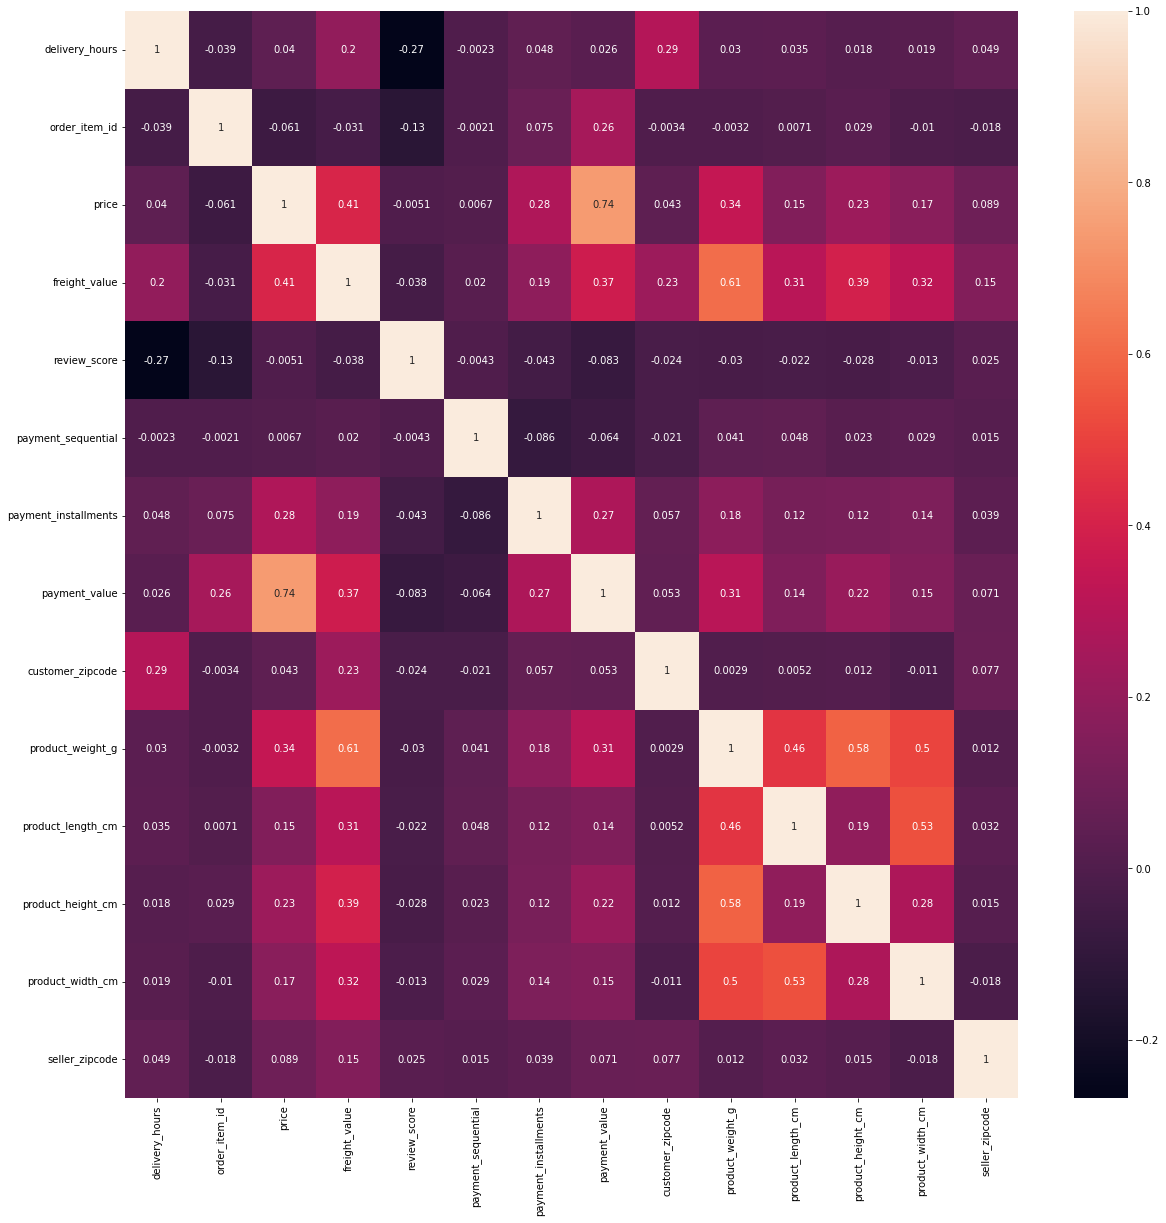

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(Master_df.corr(),annot=True)
plt.show()

In [5]:
Master_df.payment_installments.value_counts()

1     57599
2     13404
3     11551
4      7855
10     6785
5      5928
8      5013
6      4546
7      1789
9       710
12      164
15       91
18       38
24       34
11       22
20       20
13       19
14       16
17        7
16        7
21        6
0         3
23        1
22        1
Name: payment_installments, dtype: int64

In [61]:
test_df = Master_df.drop_duplicates()

In [62]:
len(Master_df)

115609

In [63]:
test_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,delivery_hours,...,customer_city,customer_state,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,seller_zipcode,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13.000000000,2017-10-18,6 days 01:30:13,145.503611,...,sao paulo,SP,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13.000000000,2017-10-18,6 days 01:30:13,145.503611,...,sao paulo,SP,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13.000000000,2017-10-18,6 days 01:30:13,145.503611,...,sao paulo,SP,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43.000000000,2017-08-28,0 days 23:16:10,23.269444,...,sao paulo,SP,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01.000000000,2017-08-15,3 days 00:54:18,72.905000,...,sao paulo,SP,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57.000000000,2018-07-20,5 days 00:32:57,120.549167,...,ferraz de vasconcelos,SP,750.0,30.0,28.0,28.0,construction_tools_lights,13660,porto ferreira,SP
115605,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30,NaN,NaN,...,gaspar,SC,400.0,16.0,4.0,11.0,auto,89031,blumenau,SC
115606,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35.000000000,2018-08-16,9 days 07:33:35,223.559722,...,fortaleza,CE,2100.0,80.0,8.0,30.0,furniture_decor,13478,americana,SP
115607,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29.000000000,2018-06-08,19 days 10:43:29,466.724722,...,teofilo otoni,MG,5900.0,41.0,21.0,41.0,furniture_decor,8320,sao paulo,SP


as reviews are given after product delivery , it does not making any sense for prediction

In [64]:
test_df = test_df.drop(columns=['review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'])


In [65]:
test_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_duration', 'delivery_hours', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zipcode',
       'customer_city', 'customer_state', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category', 'seller_zipcode', 'seller_city', 'seller_state'],
      dtype='object')

In [66]:
#encoding the payment type
test_df['payment_type'].value_counts()

test_df = pd.get_dummies(test_df,columns=['payment_type'])
test_df


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,delivery_hours,...,product_height_cm,product_width_cm,product_category,seller_zipcode,seller_city,seller_state,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13.000000000,2017-10-18,6 days 01:30:13,145.503611,...,8.0,13.0,housewares,9350,maua,SP,0,1,0,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13.000000000,2017-10-18,6 days 01:30:13,145.503611,...,8.0,13.0,housewares,9350,maua,SP,0,0,0,1
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13.000000000,2017-10-18,6 days 01:30:13,145.503611,...,8.0,13.0,housewares,9350,maua,SP,0,0,0,1
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43.000000000,2017-08-28,0 days 23:16:10,23.269444,...,8.0,13.0,housewares,9350,maua,SP,0,1,0,0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01.000000000,2017-08-15,3 days 00:54:18,72.905000,...,8.0,13.0,housewares,9350,maua,SP,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57.000000000,2018-07-20,5 days 00:32:57,120.549167,...,28.0,28.0,construction_tools_lights,13660,porto ferreira,SP,1,0,0,0
115605,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30,NaN,NaN,...,4.0,11.0,auto,89031,blumenau,SC,0,1,0,0
115606,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35.000000000,2018-08-16,9 days 07:33:35,223.559722,...,8.0,30.0,furniture_decor,13478,americana,SP,0,0,1,0
115607,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29.000000000,2018-06-08,19 days 10:43:29,466.724722,...,21.0,41.0,furniture_decor,8320,sao paulo,SP,0,1,0,0


In [67]:
test_df = test_df.drop(columns=['order_delivered_customer_date', 'order_estimated_delivery_date'])

In [68]:
test_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'delivery_duration', 'delivery_hours', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_installments', 'payment_value',
       'customer_unique_id', 'customer_zipcode', 'customer_city',
       'customer_state', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'product_category',
       'seller_zipcode', 'seller_city', 'seller_state', 'payment_type_boleto',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_voucher'],
      dtype='object')

In [69]:
len(test_df.product_category.unique())

71

In [70]:
test_df = test_df.drop(columns=['customer_city','customer_state','seller_city', 'seller_state' ,'delivery_duration','order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date'])

In [71]:
test_df

,order_id,customer_id,order_status,delivery_hours,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,seller_zipcode,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,145.503611,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,...,500.0,19.0,8.0,13.0,housewares,9350,0,1,0,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,145.503611,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,...,500.0,19.0,8.0,13.0,housewares,9350,0,0,0,1
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,145.503611,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,...,500.0,19.0,8.0,13.0,housewares,9350,0,0,0,1
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,23.269444,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,...,500.0,19.0,8.0,13.0,housewares,9350,0,1,0,0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,72.905000,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,...,500.0,19.0,8.0,13.0,housewares,9350,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,120.549167,1,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,...,750.0,30.0,28.0,28.0,construction_tools_lights,13660,1,0,0,0
115605,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,NaN,1,241a1ffc9cf969b27de6e72301020268,8501d82f68d23148b6d78bb7c4a42037,2017-03-16 19:51:36,19.70,10.96,...,400.0,16.0,4.0,11.0,auto,89031,0,1,0,0
115606,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,223.559722,1,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,45.07,...,2100.0,80.0,8.0,30.0,furniture_decor,13478,0,0,1,0
115607,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,466.724722,1,6e1c2008dea1929b9b6c27fa01381e90,edf3fabebcc20f7463cc9c53da932ea8,2018-05-28 21:31:24,219.90,24.12,...,5900.0,41.0,21.0,41.0,furniture_decor,8320,0,1,0,0


In [72]:
test_df = test_df.dropna().reset_index()
test_df

,index,order_id,customer_id,order_status,delivery_hours,order_item_id,product_id,seller_id,shipping_limit_date,price,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,seller_zipcode,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,145.503611,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,...,500.0,19.0,8.0,13.0,housewares,9350,0,1,0,0
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,145.503611,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,...,500.0,19.0,8.0,13.0,housewares,9350,0,0,0,1
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,145.503611,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,...,500.0,19.0,8.0,13.0,housewares,9350,0,0,0,1
3,3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,23.269444,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,...,500.0,19.0,8.0,13.0,housewares,9350,0,1,0,0
4,4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,72.905000,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,...,500.0,19.0,8.0,13.0,housewares,9350,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113212,115601,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,182.375278,2,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,...,600.0,30.0,20.0,20.0,sports_leisure,88490,0,1,0,0
113213,115604,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,120.549167,1,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,...,750.0,30.0,28.0,28.0,construction_tools_lights,13660,1,0,0,0
113214,115606,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,223.559722,1,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,...,2100.0,80.0,8.0,30.0,furniture_decor,13478,0,0,1,0
113215,115607,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,466.724722,1,6e1c2008dea1929b9b6c27fa01381e90,edf3fabebcc20f7463cc9c53da932ea8,2018-05-28 21:31:24,219.90,...,5900.0,41.0,21.0,41.0,furniture_decor,8320,0,1,0,0


In [73]:
test_df.order_status.value_counts()

delivered    113210
canceled          7
Name: order_status, dtype: int64

as the order status having same value apart from 7 data point we can omit that columns

In [74]:
test_df = test_df.drop(columns=['order_status'])
test_df



,index,order_id,customer_id,delivery_hours,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,seller_zipcode,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,145.503611,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,...,500.0,19.0,8.0,13.0,housewares,9350,0,1,0,0
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,145.503611,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,...,500.0,19.0,8.0,13.0,housewares,9350,0,0,0,1
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,145.503611,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,...,500.0,19.0,8.0,13.0,housewares,9350,0,0,0,1
3,3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,23.269444,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,...,500.0,19.0,8.0,13.0,housewares,9350,0,1,0,0
4,4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,72.905000,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,...,500.0,19.0,8.0,13.0,housewares,9350,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113212,115601,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,182.375278,2,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,...,600.0,30.0,20.0,20.0,sports_leisure,88490,0,1,0,0
113213,115604,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,120.549167,1,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,...,750.0,30.0,28.0,28.0,construction_tools_lights,13660,1,0,0,0
113214,115606,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,223.559722,1,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,45.07,...,2100.0,80.0,8.0,30.0,furniture_decor,13478,0,0,1,0
113215,115607,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,466.724722,1,6e1c2008dea1929b9b6c27fa01381e90,edf3fabebcc20f7463cc9c53da932ea8,2018-05-28 21:31:24,219.90,24.12,...,5900.0,41.0,21.0,41.0,furniture_decor,8320,0,1,0,0


In [75]:
test_df.order_item_id.value_counts()

1     99194
2      9896
3      2287
4       943
5       442
6       250
7        60
8        35
9        28
10       25
11       17
12       12
13        7
14        6
15        4
16        2
17        2
18        2
19        2
20        2
21        1
Name: order_item_id, dtype: int64

In [21]:
test_df.columns

Index(['index', 'order_id', 'customer_id', 'delivery_hours', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zipcode',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'product_category', 'seller_zipcode',
       'payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_voucher'],
      dtype='object')

In [22]:
t = test_df['price'] - test_df['payment_value'] 


print(t.corr(test_df['payment_installments']))

-0.12240345943887114


<AxesSubplot:>

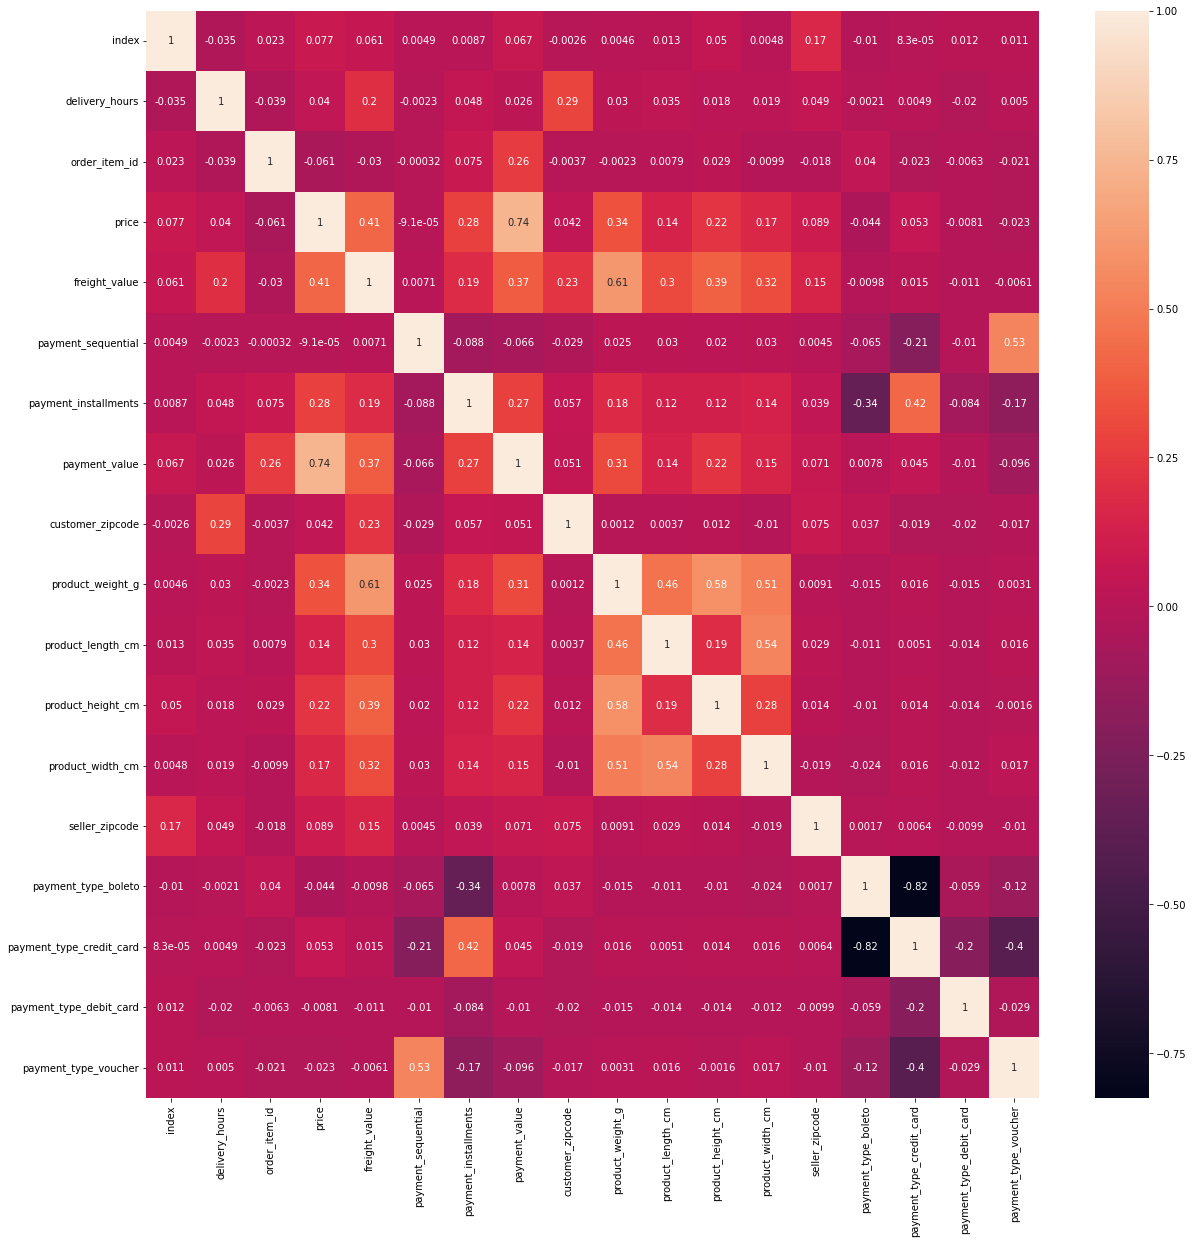

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(test_df.corr(),annot=True)

In [24]:
test_df.columns

Index(['index', 'order_id', 'customer_id', 'delivery_hours', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zipcode',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'product_category', 'seller_zipcode',
       'payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_voucher'],
      dtype='object')

In [25]:
len(test_df['customer_zipcode'].unique())

14825

In [26]:
zip_b = pd.DataFrame([test_df['customer_zipcode'] == test_df['seller_zipcode']]).T
zip_b.value_counts()

False    113192
True         25
dtype: int64

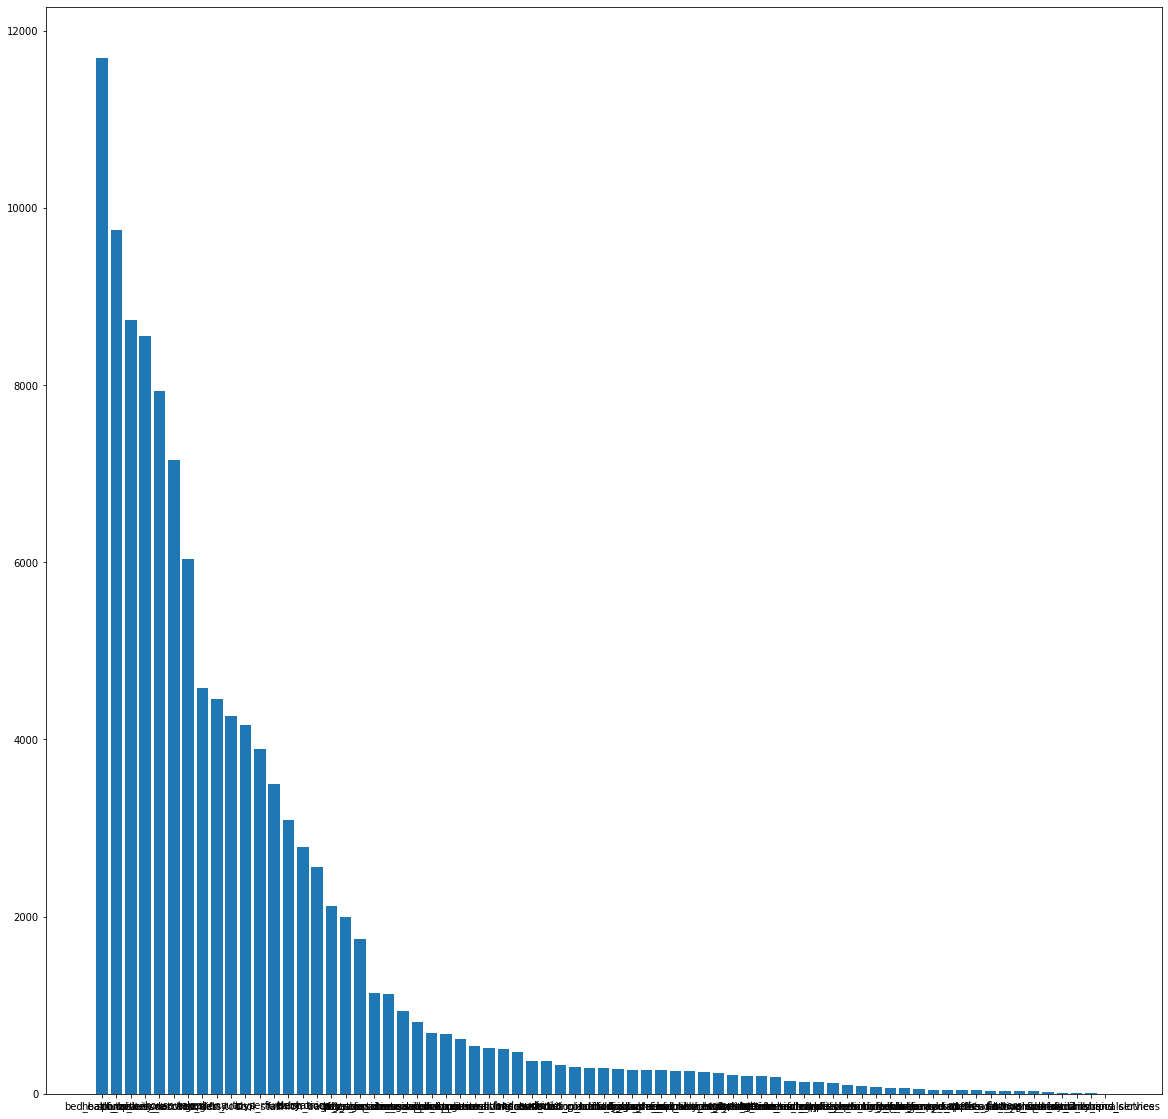

In [27]:
plt.figure(figsize = (20,20))
plt.bar(test_df['product_category'].value_counts().index, test_df['product_category'].value_counts().values )
import category_encoders as ce
tenc=ce.TargetEncoder() 
product_cat = tenc.fit_transform(test_df['product_category'],test_df['payment_installments'])


In [76]:
test_df['product_category'] = product_cat
test_df

,index,order_id,customer_id,delivery_hours,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,seller_zipcode,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,145.503611,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,...,500.0,19.0,8.0,13.0,2.981129,9350,0,1,0,0
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,145.503611,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,...,500.0,19.0,8.0,13.0,2.981129,9350,0,0,0,1
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,145.503611,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,...,500.0,19.0,8.0,13.0,2.981129,9350,0,0,0,1
3,3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,23.269444,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,...,500.0,19.0,8.0,13.0,2.981129,9350,0,1,0,0
4,4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,72.905000,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,...,500.0,19.0,8.0,13.0,2.981129,9350,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113212,115601,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,182.375278,2,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,...,600.0,30.0,20.0,20.0,2.484606,88490,0,1,0,0
113213,115604,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,120.549167,1,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,...,750.0,30.0,28.0,28.0,2.937086,13660,1,0,0,0
113214,115606,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,223.559722,1,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,45.07,...,2100.0,80.0,8.0,30.0,3.126665,13478,0,0,1,0
113215,115607,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,466.724722,1,6e1c2008dea1929b9b6c27fa01381e90,edf3fabebcc20f7463cc9c53da932ea8,2018-05-28 21:31:24,219.90,24.12,...,5900.0,41.0,21.0,41.0,3.126665,8320,0,1,0,0


In [29]:
test_df = test_df.drop(columns=['index', 'order_id', 'customer_id','order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'customer_unique_id', 
       'customer_zipcode', 'seller_zipcode'])

test_df

,delivery_hours,price,freight_value,payment_sequential,payment_installments,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,145.503611,29.99,8.72,1,1,18.12,500.0,19.0,8.0,13.0,2.981129,0,1,0,0
1,145.503611,29.99,8.72,3,1,2.00,500.0,19.0,8.0,13.0,2.981129,0,0,0,1
2,145.503611,29.99,8.72,2,1,18.59,500.0,19.0,8.0,13.0,2.981129,0,0,0,1
3,23.269444,29.99,7.78,1,3,37.77,500.0,19.0,8.0,13.0,2.981129,0,1,0,0
4,72.905000,29.99,7.78,1,1,37.77,500.0,19.0,8.0,13.0,2.981129,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113212,182.375278,44.99,22.25,1,2,134.48,600.0,30.0,20.0,20.0,2.484606,0,1,0,0
113213,120.549167,79.00,14.13,1,1,93.13,750.0,30.0,28.0,28.0,2.937086,1,0,0,0
113214,223.559722,399.00,45.07,1,1,444.07,2100.0,80.0,8.0,30.0,3.126665,0,0,1,0
113215,466.724722,219.90,24.12,1,4,244.02,5900.0,41.0,21.0,41.0,3.126665,0,1,0,0


# Model

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(test_df.drop(columns=['payment_installments']),test_df.payment_installments, test_size=0.20, random_state=42)

In [31]:
X_test

,delivery_hours,price,freight_value,payment_sequential,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
63544,407.106111,39.90,35.67,1,75.57,285.0,17.0,10.0,13.0,2.265548,0,1,0,0
85899,287.946944,69.90,17.74,1,87.64,1200.0,52.0,13.0,37.0,2.861845,0,1,0,0
29506,503.305556,179.00,16.95,1,195.95,267.0,17.0,12.0,14.0,3.662633,0,1,0,0
21926,185.899167,139.90,30.82,2,82.93,5950.0,20.0,30.0,80.0,2.484606,0,0,0,1
109132,80.427778,175.92,9.59,1,185.51,700.0,27.0,9.0,19.0,2.981129,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11753,169.433333,157.00,19.20,1,176.20,292.0,17.0,8.0,12.0,3.662633,0,1,0,0
52231,166.586111,149.99,17.30,1,167.29,975.0,37.0,31.0,17.0,3.243313,0,1,0,0
15644,142.092222,28.90,23.35,1,52.25,200.0,41.0,2.0,29.0,2.265548,0,0,1,0
89914,190.465278,119.00,33.28,1,152.28,4400.0,36.0,12.0,45.0,2.808271,0,1,0,0


In [36]:
from sklearn import svm

svm_cls = svm.SVC(decision_function_shape='ovo')
svm_cls.fit(X_train,y_train)

In [ ]:
svm_cls.predict(X_test[0])

In [42]:
from sklearn.linear_model import SGDClassifier

scg_clf = SGDClassifier(loss="log", penalty="l2", max_iter=10)
scg_clf.fit(X_train,y_train)

c:\Users\kevin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
c:\Users\kevin\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:704: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log', max_iter=10)

In [196]:
X_test = X_test.reset_index()
y_test = y_test.reset_index()

In [33]:
X_test.iloc[0:3]

,delivery_hours,price,freight_value,payment_sequential,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
63544,407.106111,39.9,35.67,1,75.57,285.0,17.0,10.0,13.0,2.265548,0,1,0,0
85899,287.946944,69.9,17.74,1,87.64,1200.0,52.0,13.0,37.0,2.861845,0,1,0,0
29506,503.305556,179.0,16.95,1,195.95,267.0,17.0,12.0,14.0,3.662633,0,1,0,0


In [197]:
y_test

,index,payment_installments
0,63544,1
1,85899,3
2,29506,3
3,21926,1
4,109132,5
...,...,...
22639,11753,1
22640,52231,3
22641,15644,1
22642,89914,5


In [35]:
t = [X_test.iloc[0]]
print(scg_clf.predict(t))
print(y_test.iloc[0])


[1]
1


c:\Users\kevin\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [48]:
from sklearn.metrics import accuracy_score
y_pred = scg_clf.predict(X_test)

print(accuracy_score(y_test,y_pred))


0.06809750927397987


### bhaiya

In [77]:
test_df.payment_installments.value_counts()

1     56419
2     13154
3     11317
4      7696
10     6634
5      5813
8      4878
6      4452
7      1739
9       695
12      161
15       88
18       38
24       34
11       22
20       19
13       18
14       15
17        7
16        7
21        6
0         3
23        1
22        1
Name: payment_installments, dtype: int64

In [78]:
test_df = test_df[test_df['payment_installments'] <= 7]
test_df = test_df[test_df['payment_installments'] != 1]


,index,order_id,customer_id,delivery_hours,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,seller_zipcode,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,145.503611,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,...,500.0,19.0,8.0,13.0,2.981129,9350,0,1,0,0
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,145.503611,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,...,500.0,19.0,8.0,13.0,2.981129,9350,0,0,0,1
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,145.503611,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,...,500.0,19.0,8.0,13.0,2.981129,9350,0,0,0,1
3,3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,23.269444,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,...,500.0,19.0,8.0,13.0,2.981129,9350,0,1,0,0
4,4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,72.905000,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,...,500.0,19.0,8.0,13.0,2.981129,9350,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113212,115601,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,182.375278,2,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,...,600.0,30.0,20.0,20.0,2.484606,88490,0,1,0,0
113213,115604,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,120.549167,1,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,...,750.0,30.0,28.0,28.0,2.937086,13660,1,0,0,0
113214,115606,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,223.559722,1,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,45.07,...,2100.0,80.0,8.0,30.0,3.126665,13478,0,0,1,0
113215,115607,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,466.724722,1,6e1c2008dea1929b9b6c27fa01381e90,edf3fabebcc20f7463cc9c53da932ea8,2018-05-28 21:31:24,219.90,24.12,...,5900.0,41.0,21.0,41.0,3.126665,8320,0,1,0,0


In [81]:
test_df = test_df[test_df['payment_installments'] != 1]
test_df = test_df.reset_index()

In [89]:
test_df = test_df.drop(columns=['level_0','index'])

In [91]:
test_df.columns

Index(['order_id', 'customer_id', 'delivery_hours', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zipcode',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'product_category', 'seller_zipcode',
       'payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_voucher'],
      dtype='object')

In [92]:
test_df = test_df.drop(columns=[ 'order_id', 'customer_id','order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'customer_unique_id', 
       'customer_zipcode', 'seller_zipcode'])

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import tqdm 
import optuna
import joblib

# Preprocessing
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [93]:
X_train, X_test, y_train, y_test = train_test_split(test_df.drop(columns=['payment_installments']),test_df.payment_installments, test_size=0.20, stratify = test_df.payment_installments, random_state=42)

In [102]:
# Define models to be trained
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000,solver="liblinear"),
    # "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    #"XGBoost": XGBClassifier(),
    "Support Vector Machine": SVC()
}

# Define number of samples to use for cross-validation
n_samples = 10000

# Create stratified folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Create empty dictionaries to store accuracy and f1 scores for each model
train_df_accuracy_scores = {}
train_df_f1_scores = {}
train_df_classification_reports = {}

In [16]:
# Loop through models and perform cross-validation
for name, model in tqdm(models.items()):
    # Create pipeline
    pipeline = make_pipeline( model)
    
    # Perform cross-validation on subset of data
    scores = cross_validate(pipeline, X_train[:n_samples], y_train[:n_samples], cv=skf, n_jobs=-1, scoring=["accuracy", "f1_macro"], return_train_score=False)
    
    # Calculate mean and standard deviation of scores
    mean_accuracy = np.mean(scores['test_accuracy'])
    std_accuracy = np.std(scores['test_accuracy'])
    mean_f1_score = np.mean(scores['test_f1_macro'])
    std_f1_score = np.std(scores['test_f1_macro'])
    
    # Store accuracy and f1 scores for each model
    train_df_accuracy_scores[name] = (mean_accuracy, std_accuracy)
    train_df_f1_scores[name] = (mean_f1_score, std_f1_score)
    
    # Store classification report for each model
    pipeline.fit(X_train[:n_samples], y_train[:n_samples])
    y_pred = pipeline.predict(X_train[:n_samples])
    train_df_classification_reports[name] = classification_report(y_train[:n_samples], y_pred)
    
    # Print results
    print(f"{name}:")
    print(f"\tAccuracy: {mean_accuracy:.3f} +/- {std_accuracy:.3f}")
    print(f"\tF1-score: {mean_f1_score:.3f} +/- {std_f1_score:.3f}")

NameError: name 'tqdm' is not defined

In [99]:
X_train.describe()

,delivery_hours,price,freight_value,payment_sequential,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
count,35339.000000,35339.000000,35339.000000,35339.000000,35339.000000,35339.000000,35339.000000,35339.000000,35339.000000,35339.000000,35339.0,35339.0,35339.0,35339.0
mean,226.795605,117.867244,20.238984,1.004216,167.201417,2133.790175,30.483177,16.903817,23.421659,2.995374,0.0,1.0,0.0,0.0
std,209.170737,137.968421,14.186840,0.064797,173.908363,3583.611843,16.154385,13.347818,11.739034,0.487414,0.0,0.0,0.0,0.0
min,-386.308056,1.200000,0.000000,1.000000,20.030000,0.000000,7.000000,2.000000,6.000000,1.775786,0.0,1.0,0.0,0.0
25%,101.758889,49.000000,13.580000,1.000000,73.270000,333.000000,18.000000,9.000000,15.000000,2.581333,0.0,1.0,0.0,0.0
50%,172.176111,85.000000,16.790000,1.000000,124.400000,800.000000,25.000000,13.000000,20.000000,2.981129,0.0,1.0,0.0,0.0
75%,290.319722,139.990000,21.890000,1.000000,195.000000,1875.000000,38.000000,21.000000,30.000000,3.243313,0.0,1.0,0.0,0.0
max,4565.654167,3105.000000,321.460000,2.000000,3358.240000,40425.000000,105.000000,105.000000,118.000000,5.985915,0.0,1.0,0.0,0.0


## GPT given model

for  PCA

In [6]:
orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [55]:
orders = pd.read_csv('olist_orders_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
order_reviews
# Merge the datasets based on the order_id column
merged = orders.merge(order_payments, on='order_id')
merged = merged.merge(order_items, on='order_id')
merged = merged.merge(products, on='product_id')
merged = merged.merge(sellers, on='seller_id')
merged = merged.merge(customers, on='customer_id')
merged = merged.merge(order_reviews, on='order_id')

In [58]:
# Extract the relevant features from the merged dataset
merged_features = merged[['payment_type', 'payment_value', 'product_category_name', 'product_photos_qty',
                     'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
                     'seller_state', 'customer_state', 'review_score', 'payment_installments']]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
merged_features[['payment_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']] = imputer.fit_transform(merged_features[['payment_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']])

# Encode categorical variables
cat_features = ['payment_type', 'product_category_name', 'seller_state', 'customer_state']
le = LabelEncoder()
merged_features[cat_features] = merged_features[cat_features].apply(le.fit_transform)

# Scale numerical variables
num_features = ['payment_value', 'product_photos_qty', 'product_weight_g', 'product_length_cm',
                'product_height_cm', 'product_width_cm', 'review_score']
scaler = StandardScaler()
merged_features[num_features] = scaler.fit_transform(merged_features[num_features])


merged_features = merged_features[merged_features['payment_installments'] <= 10]
merged_features = merged_features[merged_features['payment_installments'] != 0]
merged_features = merged_features.dropna()

C:\Users\kevin\AppData\Local\Temp\ipykernel_37608\1199289558.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_features[['payment_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']] = imputer.fit_transform(merged_features[['payment_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']])
C:\Users\kevin\AppData\Local\Temp\ipykernel_37608\1199289558.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_features[cat_featur

<AxesSubplot:>

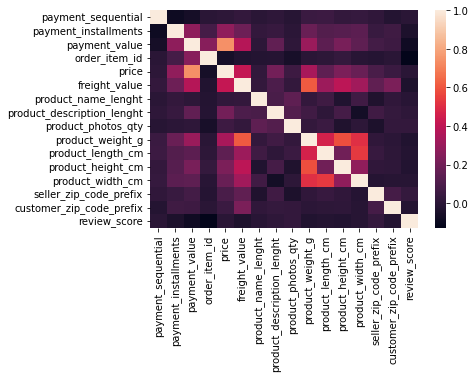

In [59]:

sns.heatmap(merged.corr())

In [16]:
merged = merged.drop(columns=[ 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',              'order_delivered_customer_date', 'order_estimated_delivery_date',  'shipping_limit_date', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_id', 'seller_id', 'customer_id'])

In [ ]:
merged = merged.drop(columns=['order_id']_

In [17]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  117601 non-null  object 
 1   order_status              117601 non-null  object 
 2   payment_sequential        117601 non-null  int64  
 3   payment_type              117601 non-null  object 
 4   payment_installments      117601 non-null  int64  
 5   payment_value             117601 non-null  float64
 6   order_item_id             117601 non-null  int64  
 7   price                     117601 non-null  float64
 8   freight_value             117601 non-null  float64
 9   product_category_name     115903 non-null  object 
 10  product_weight_g          117581 non-null  float64
 11  product_length_cm         117581 non-null  float64
 12  product_height_cm         117581 non-null  float64
 13  product_width_cm          117581 non-null  f

In [ ]:
from sklearn.decomposition import PCA

# Extract the relevant features from the merged dataset
merged_features = merged[['payment_value', 'product_photos_qty', 'product_weight_g', 'product_length_cm',
                          'product_height_cm', 'product_width_cm', 'review_score', 'payment_installments']]

# Standardize the data before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_features)

# Perform PCA to reduce dimensionality
pca = PCA()
pca.fit(scaled_data)

# Determine the number of components that explain 95% of the variance in the data
variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(variance_ratio)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Fit PCA with the selected number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# Print the explained variance ratio and the number of components selected
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Number of Components: {n_components}")

In [21]:
# Load the relevant datasets
import pandas as pd
products = pd.read_csv('C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\olist_products_dataset.csv')
# order_payments = pd.read_csv('olist_order_payments_dataset.csv')

# Merge the datasets based on the order_id column
merged = pd.read_csv('C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\OlistMaster.csv')
merged = merged.merge(products[['product_id', 'product_photos_qty','product_category_name']], on='product_id')
# Select the relevant features
relevant_features = ['payment_type', 'payment_value', 'product_category_name', 'product_photos_qty',
                     'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
                     'seller_state', 'customer_state', 'review_score', 'payment_installments']

merged = merged[relevant_features]

In [22]:
merged

,payment_type,payment_value,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_state,customer_state,review_score,payment_installments
0,credit_card,18.12,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,SP,SP,4,1
1,voucher,2.00,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,SP,SP,4,1
2,voucher,18.59,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,SP,SP,4,1
3,credit_card,37.77,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,SP,SP,4,3
4,credit_card,37.77,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,SP,SP,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
115604,boleto,93.13,construcao_ferramentas_iluminacao,2.0,750.0,30.0,28.0,28.0,SP,SP,5,1
115605,credit_card,30.66,automotivo,2.0,400.0,16.0,4.0,11.0,SC,SC,1,1
115606,debit_card,444.07,moveis_decoracao,2.0,2100.0,80.0,8.0,30.0,SP,CE,5,1
115607,credit_card,244.02,moveis_decoracao,1.0,5900.0,41.0,21.0,41.0,SP,MG,4,4


In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Handle missing values
imputer = SimpleImputer(strategy='mean')
merged[['payment_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']] = \
imputer.fit_transform(merged[['payment_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']])

# Encode categorical variables
cat_features = ['payment_type', 'product_category_name', 'seller_state', 'customer_state']
le = LabelEncoder()
merged[cat_features] = merged[cat_features].apply(le.fit_transform)

# Scale numerical variables
num_features = ['payment_value', 'product_photos_qty', 'product_weight_g', 'product_length_cm',
                'product_height_cm', 'product_width_cm', 'review_score']
scaler = StandardScaler()
merged[num_features] = scaler.fit_transform(merged[num_features])

In [24]:
merged = merged[merged['payment_installments'] <= 7]
# merged = merged[merged['payment_installments'] != 1]


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(merged.drop(columns=['payment_installments']),merged.payment_installments, test_size=0.20, stratify = merged.payment_installments, random_state=42)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import tqdm 
import optuna
import joblib

# Preprocessing
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [27]:
# Define models to be trained
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000,solver="liblinear"),
    # "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "Support Vector Machine": SVC()
}

# Define number of samples to use for cross-validation
n_samples = 100000

# Create stratified folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Create empty dictionaries to store accuracy and f1 scores for each model
train_df_accuracy_scores_gpt = {}
train_df_f1_scores_gpt = {}
train_df_classification_reports_gpt = {}

In [34]:
# Loop through models and perform cross-validation
for name, model in tqdm(models.items()):
    # Create pipeline
    pipeline = make_pipeline( model)
    
    # Perform cross-validation on subset of data
    scores = cross_validate(pipeline, X_train[:n_samples], y_train[:n_samples], cv=skf, n_jobs=-1, scoring=["accuracy", "f1_macro"], return_train_score=False)
    
    # Calculate mean and standard deviation of scores
    mean_accuracy = np.mean(scores['test_accuracy'])
    std_accuracy = np.std(scores['test_accuracy'])
    mean_f1_score = np.mean(scores['test_f1_macro'])
    std_f1_score = np.std(scores['test_f1_macro'])
    
    # Store accuracy and f1 scores for each model
    train_df_accuracy_scores_gpt[name] = (mean_accuracy, std_accuracy)
    train_df_f1_scores_gpt[name] = (mean_f1_score, std_f1_score)
    
    # Store classification report for each model
    pipeline.fit(X_train[:n_samples], y_train[:n_samples])
    y_pred = pipeline.predict(X_train[:n_samples])
    train_df_classification_reports_gpt[name] = classification_report(y_train[:n_samples], y_pred)
    
    # Print results
    print(f"{name}:")
    print(f"\tAccuracy: {mean_accuracy:.3f} +/- {std_accuracy:.3f}")
    print(f"\tF1-score: {mean_f1_score:.3f} +/- {std_f1_score:.3f}")

  0%|          | 0/6 [00:00<?, ?it/s]c:\Users\kevin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kevin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kevin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kevin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-d

Logistic Regression:
	Accuracy: 0.560 +/- 0.000
	F1-score: 0.099 +/- 0.007


 33%|███▎      | 2/6 [00:13<00:24,  6.01s/it]

Decision Tree:
	Accuracy: 0.578 +/- 0.004
	F1-score: 0.319 +/- 0.019


c:\Users\kevin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
 50%|█████     | 3/6 [00:52<01:02, 20.94s/it]

Random Forest:
	Accuracy: 0.615 +/- 0.002
	F1-score: 0.331 +/- 0.019


c:\Users\kevin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kevin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kevin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kevin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels

Gradient Boost:
	Accuracy: 0.583 +/- 0.001
	F1-score: 0.229 +/- 0.018


c:\Users\kevin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
 83%|████████▎ | 5/6 [08:31<02:18, 138.27s/it]

XGBoost:
	Accuracy: 0.600 +/- 0.002
	F1-score: 0.286 +/- 0.019


c:\Users\kevin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [28]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [50]:
# define baseline model
def baseline_model():
   model = Sequential()
   model.add(Dense(8, input_dim=11, activation='relu'))
   model.add(Dense(24,activation='relu'))
   model.add(Dense(8, activation='softmax'))
    # Compile model
   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   return model

In [51]:

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

C:\Users\kevin\AppData\Local\Temp\ipykernel_37608\1732433283.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)


In [52]:
kfold = KFold(n_splits=10, shuffle=True)

In [53]:
max(y_train.values)

7

In [54]:
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [61]:
d = pd.read_csv("OlistMaster.csv")
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115609 non-null  object 
 5   order_delivered_carrier_date   114416 non-null  object 
 6   order_delivered_customer_date  113217 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   delivery_duration              113217 non-null  object 
 9   delivery_hours                 113217 non-null  float64
 10  order_item_id                  115609 non-null  int64  
 11  product_id                     115609 non-null  object 
 12  seller_id                     

In [ ]:
hist.plot()